In [1]:
#mount to colab so data and checkpoints will persist
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
#Set your data/output folders (nicknames)
import os, pathlib
os.environ["A2_DATA_ROOT"] = "/content/drive/MyDrive/a2_data"
os.environ["A2_OUT"] = "/content/drive/MyDrive/a2_outputs"
pathlib.Path(os.environ["A2_DATA_ROOT"]).mkdir(parents=True, exist_ok=True)
pathlib.Path(os.environ["A2_OUT"]).mkdir(parents=True, exist_ok=True)
print("DATA:", os.environ["A2_DATA_ROOT"])
print("OUT :", os.environ["A2_OUT"])

DATA: /content/drive/MyDrive/a2_data
OUT : /content/drive/MyDrive/a2_outputs


In [3]:
!git clone https://github.com/Rutgers-ECE-MML4SS/multimodal-sensor-fusion-with-attention-ghazalsane.git

Cloning into 'multimodal-sensor-fusion-with-attention-ghazalsane'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 188 (delta 75), reused 69 (delta 69), pack-reused 97 (from 1)
Receiving objects: 100% (188/188), 92.85 KiB | 5.46 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [4]:
%cd multimodal-sensor-fusion-with-attention-ghazalsane

/content/multimodal-sensor-fusion-with-attention-ghazalsane


In [5]:
#whats inside environment.yml
!sed -n '1,200p' environment.yml


name: a2
channels:
  - pytorch
  - conda-forge
  - defaults
dependencies:
  # Core
  - python=3.10
  - pip

  # PyTorch (CPU version for compatibility)
  - pytorch=2.0.1
  - torchvision=0.15.2
  - torchaudio=2.0.2
  - cpuonly

  # Scientific computing
  - numpy=1.24.3
  - scipy=1.10.1
  - pandas=2.0.2

  # Machine learning
  - scikit-learn=1.2.2

  # Configuration management
  - hydra-core=1.3.2
  - omegaconf=2.3.0

  # Experiment tracking & logging
  - tensorboard=2.13.0
  - tqdm=4.65.0

  # Visualization
  - matplotlib=3.7.1
  - seaborn=0.12.2

  # Testing
  - pytest=7.3.2
  - pytest-cov=4.1.0

  # Pip packages
  - pip:
      # PyTorch Lightning for training
      - pytorch-lightning==2.0.3
      - lightning==2.0.3
      
      # Data handling
      - h5py==3.9.0
      
      # Additional utilities
      - einops==0.6.1  # Tensor operations
      - timm==0.9.2    # If using vision models



In [6]:
#whats inside environment.yml
!sed -n '1,200p' environment.yml

name: a2
channels:
  - pytorch
  - conda-forge
  - defaults
dependencies:
  # Core
  - python=3.10
  - pip

  # PyTorch (CPU version for compatibility)
  - pytorch=2.0.1
  - torchvision=0.15.2
  - torchaudio=2.0.2
  - cpuonly

  # Scientific computing
  - numpy=1.24.3
  - scipy=1.10.1
  - pandas=2.0.2

  # Machine learning
  - scikit-learn=1.2.2

  # Configuration management
  - hydra-core=1.3.2
  - omegaconf=2.3.0

  # Experiment tracking & logging
  - tensorboard=2.13.0
  - tqdm=4.65.0

  # Visualization
  - matplotlib=3.7.1
  - seaborn=0.12.2

  # Testing
  - pytest=7.3.2
  - pytest-cov=4.1.0

  # Pip packages
  - pip:
      # PyTorch Lightning for training
      - pytorch-lightning==2.0.3
      - lightning==2.0.3
      
      # Data handling
      - h5py==3.9.0
      
      # Additional utilities
      - einops==0.6.1  # Tensor operations
      - timm==0.9.2    # If using vision models



In [7]:
# Leave whatever torch/torchvision/torchaudio Colab has (GPU).
# Install the rest (you can loosen pins if there are conflicts).
# See your Python/Torch
import sys, torch
print(sys.version)
print("Torch:", torch.__version__, "| CUDA?", torch.cuda.is_available())

# 1) Make sure build tooling is up-to-date (reduces weird build issues)
%pip install -q --upgrade pip setuptools wheel packaging

# 2) Install versions compatible with modern Colab/Python/Torch
#    (loosened pins; all have manylinux wheels for py3.11/3.12)
%pip install -q \
  "numpy>=1.26,<3" \
  "scipy>=1.11" \
  "pandas>=2.1" \
  "scikit-learn>=1.3" \
  hydra-core==1.3.2 omegaconf==2.3.0 \
  "tensorboard>=2.13" \
  "tqdm>=4.66" \
  "matplotlib>=3.8" \
  "seaborn>=0.13" \
  "pytest>=7.4" "pytest-cov>=4.1" \
  "h5py>=3.10" \
  "einops>=0.7" \
  "timm>=1.0.9" \
  "pytorch-lightning>=2.4,<3"

# If your code imports the `lightning` package (not `pytorch_lightning`), also do:
# %pip install -q "lightning>=2.4,<3"

import torch
print("Torch:", torch.__version__, "| CUDA?", torch.cuda.is_available())



3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Torch: 2.8.0+cu126 | CUDA? True
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
Torch: 2.8.0+cu126 | CUDA? True


In [8]:
%cd /content/multimodal-sensor-fusion-with-attention-ghazalsane
!sed -n '1,200p' config/base.yaml
!sed -n '1,200p' config/datasets.yaml
!sed -n '1,140p' src/train.py


/content/multimodal-sensor-fusion-with-attention-ghazalsane
# Base configuration for A2 Multimodal Sensor Fusion
# This file defines all hyperparameters and paths for reproducible experiments.
# Edit this file rather than hardcoding values in your Python scripts.

# Dataset configuration
dataset:
  name: pamap2  # Options: pamap2 (recommended), mhad, cooking
  data_dir: ./data  # Where to store/load dataset
  modalities: [imu_hand, imu_chest, imu_ankle, heart_rate]  # For pamap2
                                                              # For mhad: [video, imu]
                                                              # For cooking: [video, audio]
  num_classes: 18
  
  train_split: 0.7
  val_split: 0.15
  test_split: 0.15
  batch_size: 32  # Adjust for your RAM (16-64 typical for CPU)
  num_workers: 4  # Parallel data loading (0-4 for CPU)

# Model configuration
model:
  fusion_type: hybrid  # Options: early, late, hybrid, uncertainty
  hidden_dim: 256
  output_dim: 128  # Enco

In [9]:
import numpy as np, os
root = "/content/drive/MyDrive/a2_data/pamap2"
for split in ["train","val","test"]:
    p = os.path.join(root, split)
    Xh = np.load(os.path.join(p,"imu_hand.npy"))
    Xc = np.load(os.path.join(p,"imu_chest.npy"))
    Xa = np.load(os.path.join(p,"imu_ankle.npy"))
    Hr = np.load(os.path.join(p,"heart_rate.npy"))
    y  = np.load(os.path.join(p,"labels.npy"))
    print(split, "→", Xh.shape, Xc.shape, Xa.shape, Hr.shape, y.shape)


train → (10172, 500, 17) (10172, 500, 17) (10172, 500, 17) (10172, 500, 1) (10172,)
val → (3445, 500, 17) (3445, 500, 17) (3445, 500, 17) (3445, 500, 1) (3445,)
test → (741, 500, 17) (741, 500, 17) (741, 500, 17) (741, 500, 1) (741,)


In [10]:
# in a Colab cell
!rm -rf /content/pamap2 && mkdir -p /content/pamap2
!cp -r /content/drive/MyDrive/a2_data/pamap2/* /content/pamap2/


In [11]:
from pathlib import Path
p = Path("/content/multimodal-sensor-fusion-with-attention-ghazalsane/src/fusion.py")
s = p.read_text()

# Replace the LateFusion signature to ensure num_classes comes before defaults
s = s.replace(
    "def __init__(\n        self,\n        modality_dims: Dict[str, int],\n        hidden_dim: int = 256,\n        num_classes: int,\n        dropout: float = 0.1,\n        num_heads: int | None = None,   # <-- accept & ignore\n        **kwargs,                       # <-- future-proof\n    ):",
    "def __init__(\n        self,\n        modality_dims: Dict[str, int],\n        num_classes: int,\n        hidden_dim: int = 256,\n        dropout: float = 0.1,\n        num_heads: int | None = None,   # <-- accept & ignore\n        **kwargs,                       # <-- future-proof\n    ):"
)

# (Optional) do the same for EarlyFusion/HybridFusion if they have similar issue:
s = s.replace(
    "def __init__(\n        self,\n        modality_dims: Dict[str, int],\n        hidden_dim: int = 256,\n        num_classes: int,",
    "def __init__(\n        self,\n        modality_dims: Dict[str, int],\n        num_classes: int,\n        hidden_dim: int = 256,"
)

p.write_text(s)
print("Patched fusion.py")

# Show the new lines
print("----- fusion.py [110–130] AFTER -----")
print("\n".join(p.read_text().splitlines()[109:130]))


Patched fusion.py
----- fusion.py [110–130] AFTER -----
    Pros: Handles asynchronous sensors, modular per-modality training
    Cons: Limited cross-modal interaction, fusion only at decision level
    """
    
    def __init__(
        self,
        num_classes: int,
        modality_dims: Dict[str, int],
        num_heads: int | None = None,
        hidden_dim: int = 256,
        dropout: float = 0.1,
        **kwargs,                       # <-- future-proof
    ):
        """
        Args:
            modality_dims: Dictionary mapping modality name to feature dimension
            hidden_dim: Hidden dimension for per-modality classifiers
            num_classes: Number of output classes
            dropout: Dropout probability
        """
        super().__init__()


In [12]:
import os, re, glob, numpy as np, pandas as pd
from collections import Counter
from scipy import interpolate

# === Paths ===
A2_DATA_ROOT = os.environ.get("A2_DATA_ROOT", "/content/drive/MyDrive/a2_data")
DATA_ROOT = f"{A2_DATA_ROOT}/pamap2"
RAW_DIR = f"{A2_DATA_ROOT}/pamap2/PAMAP2_Dataset"

# === Parameters ===
TARGET_SR = 100
WIN_SEC = 5.0
HOP_SEC = 2.5
WIN = int(WIN_SEC * TARGET_SR)
HOP = int(HOP_SEC * TARGET_SR)

# PAMAP2 activity IDs to keep
VALID_IDS = [1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24]
LABEL_TO_IDX = {a:i for i,a in enumerate(VALID_IDS)}
PURITY_THRESHOLD = 0.8  # <--- NEW: require at least 80% of a window to be one activity

# Make output dirs
for split in ["train","val","test"]:
    os.makedirs(os.path.join(DATA_ROOT, split), exist_ok=True)

def list_subject_files():
    paths = []
    for folder in ["Protocol", "Optional"]:
        d = os.path.join(RAW_DIR, folder)
        if os.path.isdir(d):
            paths += sorted(glob.glob(os.path.join(d, "subject*.dat")))
    return paths

def parse_subject_id(path):
    stem = os.path.splitext(os.path.basename(path))[0]
    m = re.search(r"(\d+)", stem)
    return int(m.group(1)) if m else None

def resample_to_100hz(df_raw):
    """
    Resample numeric signals to 100 Hz via linear interpolation,
    but TREAT ACTIVITY LABELS SPECIALLY (no interpolation; use ffill/bfill).
    df_raw columns (PAMAP2):
      0=timestamp, 1=activityID, 2=HR, 3-19=hand, 20-36=chest, 37-53=ankle
    """
    ts = df_raw[0].to_numpy(dtype=float)
    if len(ts) < 2 or ts[-1] <= ts[0]:
        return None, None  # (signals_df_resampled, labels_resampled)

    # New uniform time grid
    n = int(round((ts[-1] - ts[0]) * TARGET_SR)) + 1
    new_ts = np.linspace(ts[0], ts[-1], n)

    # --- Signals: interpolate (skip col 0 and col 1) ---
    cols = {}
    for col in df_raw.columns:
        if col in (0, 1):
            continue
        f = interpolate.interp1d(
            ts, df_raw[col].to_numpy(),
            kind="linear", bounds_error=False, fill_value="extrapolate"
        )
        cols[col] = f(new_ts)
    X_res = pd.DataFrame(cols, index=new_ts)

    # --- Labels: forward-fill then backfill on the new grid (NO interpolation) ---
    activity_series = pd.Series(df_raw[1].to_numpy(), index=ts)
    labels_res = activity_series.reindex(X_res.index, method='ffill')
    if pd.isna(labels_res.iloc[0]):
        labels_res = labels_res.fillna(method='bfill')
    labels_res = labels_res.to_numpy(dtype=int)

    return X_res, labels_res

def window_indices(T, win, hop):
    return [(s, s+win) for s in range(0, max(0, T - win + 1), hop)]

# Collect windows
X_hand, X_chest, X_ankle, X_hr, Y, SUBS = [], [], [], [], [], []
files = list_subject_files()
print(f"Found {len(files)} PAMAP2 files")

for f in files:
    sid = parse_subject_id(f)
    if sid is None:
        print("Skipping unparseable filename:", f)
        continue

    df_raw = pd.read_csv(f, sep=r"\s+", header=None, na_values=["NaN"], engine="c")
    # keep only valid activities
    df_raw = df_raw[df_raw[1].isin(VALID_IDS)].reset_index(drop=True)
    if len(df_raw) < WIN:
        continue

    X_res, labels = resample_to_100hz(df_raw)
    if X_res is None or len(X_res) < WIN:
        continue

    # Expected columns exist?
    required_cols = [2] + list(range(3,20)) + list(range(20,37)) + list(range(37,54))
    if any(c not in X_res.columns for c in required_cols):
        print(f"Skipping {f}: missing some required signal columns")
        continue

    hr    = np.nan_to_num(X_res[2].to_numpy(dtype=float).reshape(-1, 1))
    hand  = np.nan_to_num(X_res.loc[:, 3:19].to_numpy(dtype=float))
    chest = np.nan_to_num(X_res.loc[:, 20:36].to_numpy(dtype=float))
    ankle = np.nan_to_num(X_res.loc[:, 37:53].to_numpy(dtype=float))

    # Sliding windows with purity check
    for s, e in window_indices(len(X_res), WIN, HOP):
        if e - s != WIN:
            continue

        y_win = labels[s:e]
        # majority label among VALID_IDS only
        valid_mask = np.isin(y_win, VALID_IDS)
        if not valid_mask.any():
            continue
        maj_label, maj_count = Counter(y_win[valid_mask]).most_common(1)[0]

        # NEW: purity threshold to avoid transition-dominated windows
        if maj_count / WIN < PURITY_THRESHOLD:
            continue

        Y.append(LABEL_TO_IDX[maj_label])
        SUBS.append(sid)
        X_hand.append(hand[s:e].astype(np.float32))
        X_chest.append(chest[s:e].astype(np.float32))
        X_ankle.append(ankle[s:e].astype(np.float32))
        X_hr.append(hr[s:e].astype(np.float32))

# Stack
feat_dim = 17
X_hand  = np.stack(X_hand) if X_hand else np.empty((0, WIN, feat_dim), np.float32)
X_chest = np.stack(X_chest) if X_chest else np.empty((0, WIN, feat_dim), np.float32)
X_ankle = np.stack(X_ankle) if X_ankle else np.empty((0, WIN, feat_dim), np.float32)
X_hr    = np.stack(X_hr)   if X_hr   else np.empty((0, WIN, 1),     np.float32)
Y       = np.asarray(Y, dtype=np.int64)
SUBS    = np.asarray(SUBS, dtype=np.int32)

print("Collected shapes:",
      "hand", X_hand.shape, "chest", X_chest.shape, "ankle", X_ankle.shape, "hr", X_hr.shape, "labels", Y.shape)
print("Unique subjects:", np.unique(SUBS))

# Subject-wise split: 6/2/1 (keeps generalization clean)
uniq = np.unique(SUBS)
if len(uniq) < 9:
    print("Warning: expected ~9 unique subjects; found", len(uniq), uniq)
rng = np.random.default_rng(42)
rng.shuffle(uniq)
train_subs, val_subs, test_subs = uniq[:6], uniq[6:8], uniq[8:]

def save_split(name, keep_subs):
    m = np.isin(SUBS, keep_subs)
    out_dir = os.path.join(DATA_ROOT, name)
    np.save(os.path.join(out_dir, "imu_hand.npy"),   np.ascontiguousarray(X_hand[m]))
    np.save(os.path.join(out_dir, "imu_chest.npy"),  np.ascontiguousarray(X_chest[m]))
    np.save(os.path.join(out_dir, "imu_ankle.npy"),  np.ascontiguousarray(X_ankle[m]))
    np.save(os.path.join(out_dir, "heart_rate.npy"), np.ascontiguousarray(X_hr[m]))
    np.save(os.path.join(out_dir, "labels.npy"),     np.ascontiguousarray(Y[m]))
    # NEW: also save subjects so you can verify group splits later
    np.save(os.path.join(out_dir, "subjects.npy"),   np.ascontiguousarray(SUBS[m]))

save_split("train", train_subs)
save_split("val",   val_subs)
save_split("test",  test_subs)

# Small summaries
for split, subs in [("train", train_subs), ("val", val_subs), ("test", test_subs)]:
    p = os.path.join(DATA_ROOT, split)
    y = np.load(os.path.join(p, "labels.npy"))
    cls, cnt = np.unique(y, return_counts=True)
    print(f"{split}: N={len(y)}, subjects={sorted(np.unique(np.load(os.path.join(p,'subjects.npy')).tolist()))}")
    print("  class idx -> count:", dict(zip(cls.tolist(), cnt.tolist())))


Found 14 PAMAP2 files
Collected shapes: hand (14462, 500, 17) chest (14462, 500, 17) ankle (14462, 500, 17) hr (14462, 500, 1) labels (14462,)
Unique subjects: [101 102 103 104 105 106 107 108 109]
train: N=10172, subjects=[np.int64(101), np.int64(103), np.int64(104), np.int64(105), np.int64(107), np.int64(108)]
  class idx -> count: {0: 711, 1: 552, 2: 591, 3: 945, 4: 429, 5: 605, 6: 691, 7: 357, 8: 744, 9: 417, 10: 509, 11: 927, 12: 820, 13: 866, 14: 221, 15: 600, 16: 74, 17: 113}
val: N=3548, subjects=[np.int64(102), np.int64(106)]
  class idx -> count: {0: 232, 1: 187, 2: 220, 3: 313, 4: 212, 5: 243, 6: 282, 8: 263, 10: 197, 11: 471, 12: 318, 13: 327, 14: 86, 15: 145, 17: 52}
test: N=742, subjects=[np.int64(109)]
  class idx -> count: {8: 290, 14: 143, 15: 171, 16: 114, 17: 24}


In [15]:
# === LATE train MIX

# --- (A) Paths & knobs -------------------------------------------------------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"
DATA_DIR_OLD = "/content/drive/MyDrive/a2_data/pamap2"   # <- same as your Code 1
DATA_DIR_NEW = "/content/pamap2_resplit"                 # new stratified 70/15/15
EXPERIMENT_NAME = "a2_late_pamap2_subjectwise"           # same name as Code 1
SEED = 42

# Modalities & dims (LATE + small CNN encoders as in Code 1)
MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# --- (B) Environment prep ----------------------------------------------------
import os, sys, glob, json, re, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

# Repo imports
print(">> cd", REPO_ROOT)
%cd $REPO_ROOT
src = os.path.join(REPO_ROOT, "src")
if src not in sys.path: sys.path.append(src)
from data import create_dataloaders
from train import MultimodalFusionModule

# --- (C) Step 1: Train (Code 1) ---------------------------------------------
# You can skip training by setting DO_TRAIN=False if you already trained.
DO_TRAIN = True

train_cmd = [
    "python", "src/train.py",
    "dataset.name=pamap2",
    f"dataset.data_dir={DATA_DIR_OLD}",
    "dataset.batch_size=64", "dataset.num_workers=2",
    "dataset.num_classes=18",                                 # keep head size stable
    f'experiment.save_dir="{SAVE_DIR}"',
    f'experiment.name="{EXPERIMENT_NAME}"',
    "experiment.save_top_k=1",
    "model.fusion_type=late", "model.hidden_dim=64", "model.output_dim=32", "model.dropout=0.1",
    "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
    "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
    "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
    "+model.encoders.heart_rate.encoder_type=cnn", "+model.encoders.heart_rate.input_dim=1",
    "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    "evaluation.missing_modality_test=false",
    "evaluation.uncertainty_analysis=false",
]

if DO_TRAIN:
    print("\n=== TRAIN: launching Code 1 with your exact hyperparams ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training process failed.")

# --- (D) Discover newest run dir & best checkpoint --------------------------
def newest_run(save_dir, name_prefix):
    # Typical run dir looks like: <save_dir>/<name>_YYYYMMDD_HHMMSS
    cands = sorted(glob.glob(os.path.join(save_dir, f"{name_prefix}*")))
    if not cands:
        return None
    # sort by mtime (newest last)
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

RUN_DIR = newest_run(SAVE_DIR, EXPERIMENT_NAME)
assert RUN_DIR and os.path.isdir(RUN_DIR), f"Could not find a run dir under {SAVE_DIR} starting with {EXPERIMENT_NAME}"
print("\nUsing RUN_DIR:", RUN_DIR)

ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
assert candidates, f"No checkpoints found in {ckpt_dir}"

def parse_val_loss_from_name(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

# pick lowest val/loss if present; otherwise, last one
candidates.sort(key=parse_val_loss_from_name)
CKPT = candidates[0] if parse_val_loss_from_name(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# --- (E) Step 2: Load OLD splits & build NEW stratified 70/15/15 ------------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(
                f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)"
            )
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

# Sanity: N matches within each split
for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

# Concatenate pool
X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

classes_sorted = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS},
      "| labels:", y_all.shape, "| unique labels:", classes_sorted)
if classes_sorted != list(range(len(classes_sorted))):
    print("WARNING: Labels are not 0..C-1 consecutive. Keeping original IDs to match the checkpoint class order.")

# Stratified 70/15/15 *without* remapping labels
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

# No unseen classes in train
missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

# Mirror original layout (with/without "data/" prefix)
use_data_prefix = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy").endswith(f"data/train/{MODS[0]}.npy")
def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# --- (F) Step 3: Build cfg & test that checkpoint on the NEW test split -----
# Base cfg (if present) + overrides. Keep num_classes=18 to match the head.
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "num_classes": 18,               # <- stable head size
            "modalities": MODS,
        },
        "model": {
            "fusion_type": "late",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

# Some configs may expect this key
try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

# Optional: faster matmul
try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing LATE checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, LATE) ===")
print(results)


>> cd /content/multimodal-sensor-fusion-with-attention-ghazalsane
/content/multimodal-sensor-fusion-with-attention-ghazalsane

=== TRAIN: launching Code 1 with your exact hyperparams ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/drive/MyDrive/a2_data/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_late_pamap2_subjectwise" experiment.save_top_k=1 model.fusion_type=late model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoders.heart_rate.encoder_type=cnn +model.encoders.heart_rate.input_dim=1 training.max_epochs=50 training.learning_rate=3e-3 training.scheduler=cosine evaluation.missing_modality_test=false evalu

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt



=== Testing LATE checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt


/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val/loss', 'mode': 'min'}"].
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.8387096524238586     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, LATE) ===
[{'test/acc': 0.8387096524238586}]


In [36]:
# === LATE: train + stratified re-split + re-test + calibration audit ===
# Single Colab cell.

# --- (A) Paths & knobs -------------------------------------------------------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"
DATA_DIR_OLD = "/content/drive/MyDrive/a2_data/pamap2"   # <- same as your Code 1
DATA_DIR_NEW = "/content/pamap2_resplit"                 # new stratified 70/15/15
EXPERIMENT_NAME = "a2_late_pamap2_subjectwise"           # same name as Code 1
SEED = 42

# Modalities & dims (LATE + small CNN encoders as in Code 1)
MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# --- (B) Environment prep ----------------------------------------------------
import os, sys, glob, json, re, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

print(">> cd", REPO_ROOT)
%cd $REPO_ROOT
src = os.path.join(REPO_ROOT, "src")
if src not in sys.path: sys.path.append(src)
from data import create_dataloaders
from train import MultimodalFusionModule

# --- (C) Step 1: Train (Code 1) ---------------------------------------------
DO_TRAIN = True
train_cmd = [
    "python", "src/train.py",
    "dataset.name=pamap2",
    f"dataset.data_dir={DATA_DIR_OLD}",
    "dataset.batch_size=64", "dataset.num_workers=2",
    "dataset.num_classes=18",
    f'experiment.save_dir="{SAVE_DIR}"',
    f'experiment.name="{EXPERIMENT_NAME}"',
    "experiment.save_top_k=1",
    "model.fusion_type=late", "model.hidden_dim=64", "model.output_dim=32", "model.dropout=0.1",
    "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
    "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
    "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
    "+model.encoders.heart_rate.encoder_type=cnn", "+model.encoders.heart_rate.input_dim=1",
    "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    "evaluation.missing_modality_test=false",
    "evaluation.uncertainty_analysis=false",
]
if DO_TRAIN:
    print("\n=== TRAIN: launching Code 1 with your exact hyperparams ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training process failed.")

# --- (D) Discover newest run dir & best checkpoint --------------------------
def newest_run(save_dir, name_prefix):
    cands = sorted(glob.glob(os.path.join(save_dir, f"{name_prefix}*")))
    if not cands: return None
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

RUN_DIR = newest_run(SAVE_DIR, EXPERIMENT_NAME)
assert RUN_DIR and os.path.isdir(RUN_DIR), f"Could not find a run dir under {SAVE_DIR} starting with {EXPERIMENT_NAME}"
print("\nUsing RUN_DIR:", RUN_DIR)

ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
assert candidates, f"No checkpoints found in {ckpt_dir}"

def parse_val_loss_from_name(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

candidates.sort(key=parse_val_loss_from_name)
CKPT = candidates[0] if parse_val_loss_from_name(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# --- (E) Step 2: Build NEW stratified 70/15/15 (labels preserved) -----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(
                f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)"
            )
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

classes_sorted = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS},
      "| labels:", y_all.shape, "| unique labels:", classes_sorted)
if classes_sorted != list(range(len(classes_sorted))):
    print("WARNING: Labels are not 0..C-1 consecutive. Keeping original IDs to match the checkpoint class order.")

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

use_data_prefix = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy").endswith(f"data/train/{MODS[0]}.npy")
def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# --- (F) Step 3: Build cfg & test on the NEW test split ---------------------
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "num_classes": 18,
            "modalities": MODS,
        },
        "model": {
            "fusion_type": "late",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing LATE checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, LATE) ===")
print(results)

# --- (G) Confidence Calibration Audit: ECE, NLL, Reliability Diagram --------
# Outputs:
#   - <RUN_DIR>/experiments/uncertainty.json
#   - <RUN_DIR>/analysis/calibration.png
# Flip DO_TEMP_SCALE=True to calibrate on the VAL split (temperature scaling).

import itertools, matplotlib.pyplot as plt
from sklearn.metrics import log_loss

DO_TEMP_SCALE = False
NUM_BINS = 10

exp_dir = os.path.join(RUN_DIR, "experiments"); os.makedirs(exp_dir, exist_ok=True)
ana_dir = os.path.join(RUN_DIR, "analysis");    os.makedirs(ana_dir, exist_ok=True)
json_out = os.path.join(exp_dir, "uncertainty.json")
fig_out  = os.path.join(ana_dir, "calibration.png")

def load_model_for_inference(ckpt_path, cfg, device):
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=False)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    return m

def extract_xy(batch):
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2:
        return batch[0], batch[1]
    else:
        raise RuntimeError(f"Unrecognized batch format: {type(batch)}")

def to_device_batch(X, device):
    if isinstance(X, dict):
        return {k: v.to(device, non_blocking=True) for k, v in X.items()}
    return X.to(device, non_blocking=True)

def forward_logits(model, X):
    out = model(X)
    return out["logits"] if (isinstance(out, dict) and "logits" in out) else out

def collect_logits_and_labels(model, loader, device):
    logits_list, labels_list = [], []
    with torch.no_grad():
        it = iter(loader)
        try:
            b0 = next(it)
            X0, y0 = extract_xy(b0); X0 = to_device_batch(X0, device)
            _ = forward_logits(model, X0)  # warmup
        except StopIteration:
            return np.zeros((0, cfg.dataset.num_classes)), np.zeros((0,), dtype=int)
        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = to_device_batch(X, device); y = y.to(device)
            lg = forward_logits(model, X)
            logits_list.append(lg.detach().cpu().numpy())
            labels_list.append(y.detach().cpu().numpy())
    return np.concatenate(logits_list, axis=0), np.concatenate(labels_list, axis=0).astype(int)

def softmax_np(z):
    z = z - z.max(axis=1, keepdims=True)
    ez = np.exp(z)
    return ez / ez.sum(axis=1, keepdims=True)

def expected_calibration_error(probs, labels, num_bins=10):
    conf = probs.max(axis=1)
    preds = probs.argmax(axis=1)
    accur = (preds == labels).astype(np.float32)
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    ece = 0.0; per_bin = []
    for b in range(num_bins):
        lo, hi = bins[b], bins[b+1]
        mask = (conf > lo) & (conf <= hi) if b > 0 else (conf >= lo) & (conf <= hi)
        n = mask.sum()
        if n == 0:
            per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=float('nan'), acc=float('nan'), n=0))
            continue
        bin_conf = float(conf[mask].mean())
        bin_acc  = float(accur[mask].mean())
        ece += (n / len(conf)) * abs(bin_acc - bin_conf)
        per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=bin_conf, acc=bin_acc, n=int(n)))
    return float(ece), per_bin

def nll_from_logits(logits, labels):
    probs = softmax_np(logits)
    n_classes = probs.shape[1]
    return float(log_loss(labels, probs, labels=list(range(n_classes))))

def fit_temperature_on_val(model, device, num_bins=10):
    try:
        train_loader, val_loader, _ = create_dataloaders(
            dataset_name=cfg.dataset.name,
            data_dir=cfg.dataset.data_dir,
            modalities=cfg.dataset.modalities,
            batch_size=cfg.dataset.batch_size,
            num_workers=cfg.dataset.num_workers,
            modality_dropout=0.0
        )
    except Exception:
        return 1.0
    if val_loader is None:
        return 1.0
    logits_val, labels_val = collect_logits_and_labels(model, val_loader, device)
    logits_t = torch.tensor(logits_val, dtype=torch.float32, device=device)
    y_t = torch.tensor(labels_val, dtype=torch.long, device=device)
    T = torch.nn.Parameter(torch.ones(1, device=device))
    opt = torch.optim.LBFGS([T], lr=0.1, max_iter=50, line_search_fn="strong_wolfe")
    def _closure():
        opt.zero_grad()
        scaled = logits_t / torch.clamp(T, min=1e-3)
        loss = torch.nn.functional.cross_entropy(scaled, y_t)
        loss.backward()
        return loss
    try:
        opt.step(_closure)
        T_val = float(torch.clamp(T, min=1e-3).item())
    except Exception:
        T_val = 1.0
    return T_val

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inf_model = load_model_for_inference(CKPT, cfg, device)
logits_test, labels_test = collect_logits_and_labels(inf_model, test_loader, device)
probs_test = softmax_np(logits_test)

ece, bins_info = expected_calibration_error(probs_test, labels_test, num_bins=NUM_BINS)
nll = nll_from_logits(logits_test, labels_test)
acc = float((probs_test.argmax(axis=1) == labels_test).mean())

report = {
    "split": "test",
    "num_samples": int(labels_test.size),
    "num_bins": NUM_BINS,
    "metrics_uncalibrated": {"accuracy": acc, "ece": ece, "nll": nll},
    "bins_uncalibrated": bins_info
}

DO_TEMP_SCALE = False  # <- set True to calibrate using VAL split
T_star = 1.0
calib_curve = None
if DO_TEMP_SCALE:
    T_star = fit_temperature_on_val(inf_model, device, num_bins=NUM_BINS)
    probs_cal = softmax_np(logits_test / T_star)
    ece_cal, bins_cal = expected_calibration_error(probs_cal, labels_test, num_bins=NUM_BINS)
    nll_cal = nll_from_logits(logits_test / T_star, labels_test)
    acc_cal = float((probs_cal.argmax(axis=1) == labels_test).mean())
    report["temperature"] = T_star
    report["metrics_calibrated"] = {"accuracy": acc_cal, "ece": ece_cal, "nll": nll_cal}
    report["bins_calibrated"] = bins_cal
    calib_curve = (bins_cal, f"Calibrated (T={T_star:.2f})")

with open(json_out, "w") as f:
    json.dump(report, f, indent=2)
print("Saved metrics JSON ->", json_out)

# Reliability diagram
import matplotlib.pyplot as plt
def _curve_from_bins(binfo):
    xs, ys = [], []
    for b in binfo:
        if b["n"] > 0:
            xs.append(0.5*(b["lo"]+b["hi"]))
            ys.append(b["acc"])
    return xs, ys

plt.figure(figsize=(6,6))
xs_u, ys_u = _curve_from_bins(bins_info)
plt.plot(xs_u, ys_u, marker="o", label="Uncalibrated")
if calib_curve is not None:
    bins_c, label_c = calib_curve
    xs_c, ys_c = _curve_from_bins(bins_c)
    plt.plot(xs_c, ys_c, marker="o", linestyle="--", label=label_c)
plt.plot([0,1], [0,1])
plt.xlabel("Predicted confidence")
plt.ylabel("Empirical accuracy")
plt.title(f"Reliability Diagram ({NUM_BINS} bins)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.savefig(fig_out, dpi=180)
plt.close()
print("Saved reliability diagram ->", fig_out)

print("\n=== Calibration Summary (TEST) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ECE:      {ece:.4f}  (target < 0.10)")
print(f"NLL:      {nll:.4f}")
if 'metrics_calibrated' in report:
    print(f"T*:       {T_star:.3f}")
    print(f"ECE_cal:  {report['metrics_calibrated']['ece']:.4f}")
    print(f"NLL_cal:  {report['metrics_calibrated']['nll']:.4f}")


>> cd /content/multimodal-sensor-fusion-with-attention-ghazalsane
/content/multimodal-sensor-fusion-with-attention-ghazalsane

=== TRAIN: launching Code 1 with your exact hyperparams ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/drive/MyDrive/a2_data/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_late_pamap2_subjectwise" experiment.save_top_k=1 model.fusion_type=late model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoders.heart_rate.encoder_type=cnn +model.encoders.heart_rate.input_dim=1 training.max_epochs=50 training.learning_rate=3e-3 training.scheduler=cosine evaluation.missing_modality_test=false evalu

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val/loss', '


=== Testing LATE checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.8387096524238586     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, LATE) ===
[{'test/acc': 0.8387096524238586}]
Saved metrics JSON -> /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/experiments/uncertainty.json
Saved reliability diagram -> /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/analysis/calibration.png

=== Calibration Summary (TEST) ===
Accuracy: 0.8387
ECE:      0.1211  (target < 0.10)
NLL:      1.2853


In [42]:
# === Sensor Failure Stress Test (STRICTLY LATE fusion) — standalone cell ===
# Outputs:
#   <RUN_DIR_LATE>/experiments/missing_modality_late.json
# Prints: per-subset acc/F1 + single-missing drops vs full

REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"
DATA_DIR  = "/content/pamap2_resplit"

RUN_LATE_NAME = "a2_late_pamap2_subjectwise"    # exact (no timestamp)

ALL_MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
SUBSETS = [
    ("imu_hand+imu_chest+imu_ankle+heart_rate", ["imu_hand","imu_chest","imu_ankle","heart_rate"]),
    ("imu_hand", ["imu_hand"]),
    ("imu_chest", ["imu_chest"]),
    ("imu_ankle", ["imu_ankle"]),
    ("heart_rate", ["heart_rate"]),
    ("imu_chest+imu_ankle", ["imu_chest","imu_ankle"]),
    ("imu_hand+imu_ankle", ["imu_hand","imu_ankle"]),
    ("imu_hand+heart_rate", ["imu_hand","heart_rate"]),
    ("imu_chest+heart_rate", ["imu_chest","heart_rate"]),
    ("imu_chest+imu_ankle+heart_rate", ["imu_chest","imu_ankle","heart_rate"]),
    ("imu_hand+imu_ankle+heart_rate", ["imu_hand","imu_ankle","heart_rate"]),
    ("imu_hand+imu_chest+imu_ankle", ["imu_hand","imu_chest","imu_ankle"]),
    ("imu_hand+imu_chest+heart_rate", ["imu_hand","imu_chest","heart_rate"]),
]

# --- Imports / env
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

import os, sys, glob, re, json, itertools, math
import numpy as np
import torch
import pytorch_lightning as pl
from omegaconf import OmegaConf
from sklearn.metrics import accuracy_score, f1_score

%cd $REPO_ROOT
if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")

from data import create_dataloaders
from train import MultimodalFusionModule

ACCEL = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
torch.set_float32_matmul_precision("high")

def resolve_run_dir(save_dir, name_exact):
    rd = os.path.join(save_dir, name_exact)
    if os.path.isdir(rd): return rd
    # fallback: pick newest starting with exact name
    cands = [p for p in glob.glob(os.path.join(save_dir, f"{name_exact}*")) if os.path.isdir(p)]
    assert cands, f"No run directory starting with {name_exact} under {save_dir}"
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

def best_ckpt(run_dir):
    ckpt_dir = os.path.join(run_dir, "checkpoints")
    cands = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
    if not cands:
        cands = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
    assert cands, f"No checkpoints in {ckpt_dir}"
    def parse_val_loss(p):
        m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
        return float(m.group(1)) if m else float("inf")
    cands.sort(key=parse_val_loss)
    return cands[0] if parse_val_loss(cands[0]) != float("inf") else cands[-1]

def build_cfg_late(modalities):
    base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
    base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})
    enc = {
        "imu_hand":  {"encoder_type":"cnn","input_dim":17},
        "imu_chest": {"encoder_type":"cnn","input_dim":17},
        "imu_ankle": {"encoder_type":"cnn","input_dim":17},
        "heart_rate":{"encoder_type":"cnn","input_dim":1},
    }
    return OmegaConf.merge(
        base,
        {
            "dataset": {
                "name": "pamap2",
                "data_dir": DATA_DIR,
                "batch_size": 64,
                "num_workers": 2,
                "modalities": modalities,
                "num_classes": 18,
            },
            "model": {
                "fusion_type": "late",     # <-- FORCE LATE HERE
                "hidden_dim": 64,
                "output_dim": 32,
                "dropout": 0.1,
                "num_heads": 4,
                "encoders": {k: v for k, v in enc.items() if k in modalities},
            },
            "evaluation": {"missing_modality_test": False},
            "device": "gpu",
        },
    )

def get_test_loader(cfg):
    try:
        modality_dropout = cfg.training.augmentation.modality_dropout
    except Exception:
        modality_dropout = 0.0
    _, _, tl = create_dataloaders(
     dataset_name=cfg.dataset.name,
     data_dir=cfg.dataset.data_dir,
     modalities=cfg.dataset.modalities,
     batch_size=cfg.dataset.batch_size,
     num_workers=cfg.dataset.num_workers,
     modality_dropout=modality_dropout,
    )
    return tl

def load_late_model(ckpt_path, cfg, device):
    # Ensure the model is constructed as 'late'
    assert cfg.model.fusion_type == "late", f"cfg fusion_type must be 'late', got {cfg.model.fusion_type}"
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=True)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    # sanity: check the hparams if available
    ft = None
    for key in ("hparams", "hp", "cfg"):
        obj = getattr(m, key, None)
        if obj is not None:
            try:
                ft = obj["model"]["fusion_type"]
            except Exception:
                try:
                    ft = obj.model.fusion_type
                except Exception:
                    pass
            if ft: break
    print(f"[sanity] model fusion_type (from hparams/cfg): {ft}")
    return m

def extract_xy(batch):
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2 and isinstance(batch[0], dict):
        return batch[0], batch[1]
    else:
        raise RuntimeError(f"Expected dict-based batch, got {type(batch)}")

def apply_subset(X, keep_modalities, all_modalities, device):
    out = {}
    for m in all_modalities:
        if m not in X:
            raise KeyError(f"Batch missing expected modality key '{m}'. Got keys: {list(X.keys())}")
        out[m] = X[m].to(device, non_blocking=True) if (m in keep_modalities) \
                 else torch.zeros_like(X[m], device=device)
    return out

def forward_with_optional_mask(model, X, keep_modalities, all_modalities, device):
    use_mask = "modality_mask" in str(model.forward)
    if not use_mask:
        return model(X)
    any_mod = next(iter(X.values()))
    B = any_mod.shape[0]
    mask_vec = torch.tensor([m in keep_modalities for m in all_modalities],
                            device=device, dtype=torch.bool).unsqueeze(0).expand(B, -1)
    return model(X, modality_mask=mask_vec)

def eval_subset(model, loader, keep_modalities, all_modalities, device):
    ys, preds = [], []
    with torch.no_grad():
        it = iter(loader)
        try:
            b0 = next(it)
        except StopIteration:
            return dict(acc=float("nan"), f1_macro=float("nan"))
        # warmup
        X0, y0 = extract_xy(b0)
        X0 = apply_subset(X0, keep_modalities, all_modalities, device)
        _ = forward_with_optional_mask(model, X0, keep_modalities, all_modalities, device)

        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = apply_subset(X, keep_modalities, all_modalities, device)
            y = y.to(device)
            out = forward_with_optional_mask(model, X, keep_modalities, all_modalities, device)
            logits = out["logits"] if (isinstance(out, dict) and "logits" in out) else out
            pred = torch.argmax(logits, dim=-1)
            ys.append(y.detach().cpu().numpy())
            preds.append(pred.detach().cpu().numpy())
    y_true = np.concatenate(ys); y_pred = np.concatenate(preds)
    return dict(
        acc=float(accuracy_score(y_true, y_pred)),
        f1_macro=float(f1_score(y_true, y_pred, average="macro"))
    )

# --- Resolve LATE run & ckpt, build a LATE cfg/loader for FULL mods
RUN_DIR_LATE = resolve_run_dir(SAVE_DIR, RUN_LATE_NAME)
CKPT_LATE    = best_ckpt(RUN_DIR_LATE)
CFG_LATE     = build_cfg_late(ALL_MODS)
TEST_LOADER  = get_test_loader(CFG_LATE)

print("Resolved LATE run:", RUN_DIR_LATE)
print("Using ckpt:", CKPT_LATE)
print("CFG_LATE.model.fusion_type:", CFG_LATE.model.fusion_type)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = load_late_model(CKPT_LATE, CFG_LATE, device)

# --- Run stress test strictly for LATE
print("\n=== Sensor Failure Stress Test (LATE) ===")
results = {}
for name, mods in SUBSETS:
    acc_f1 = eval_subset(model, TEST_LOADER, keep_modalities=set(mods), all_modalities=ALL_MODS, device=device)
    results[name] = acc_f1
    print(f"{name:<45} acc={acc_f1['acc']:.4f}  f1_macro={acc_f1['f1_macro']:.4f}")

# --- Degradation vs FULL
full_key = "imu_hand+imu_chest+imu_ankle+heart_rate"
assert full_key in results, "Full-modality evaluation missing."
full_acc = results[full_key]["acc"]

for k, v in results.items():
    v["acc_drop_from_full"] = float((full_acc - v["acc"]) / max(full_acc, 1e-9)) if full_acc > 0 else float("nan")

# --- Save ONLY into LATE run dir
exp_dir = os.path.join(RUN_DIR_LATE, "experiments")
os.makedirs(exp_dir, exist_ok=True)
out_json = os.path.join(exp_dir, "missing_modality_late.json")
payload = {
    "modalities": ALL_MODS,
    "target_max_drop_single_missing": 0.20,
    "full": {"key": full_key, **results[full_key]},
    "subsets": results,
}
with open(out_json, "w") as f:
    json.dump(payload, f, indent=2)
print("\nSaved:", out_json)

print("\n=== Singles vs Full (target <20% drop) ===")
ok_all = True
for m in ALL_MODS:
    v = results[m]
    drop_pct = 100.0 * v["acc_drop_from_full"]
    ok = drop_pct <= 20.0 + 1e-9
    ok_all &= ok
    print(f"{m:<12} acc={v['acc']:.4f}  f1_macro={v['f1_macro']:.4f}  drop={drop_pct:6.2f}%   [{'OK' if ok else 'FAIL'}]")

print("\nGraceful degradation (single missing) overall:", "PASS ✅" if ok_all else "FAIL ❌")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/multimodal-sensor-fusion-with-attention-ghazalsane
Resolved LATE run: /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise
Using ckpt: /content/drive/MyDrive/a2_runs/a2_late_pamap2_subjectwise/checkpoints/last.ckpt
CFG_LATE.model.fusion_type: late
[sanity] model fusion_type (from hparams/cfg): None

=== Sensor Failure Stress Test (LATE) ===
imu_hand+imu_chest+imu_ankle+heart_rate       acc=0.8387  f1_macro=0.8534
imu_hand                                      acc=0.0129  f1_macro=0.0014
imu_chest                                     acc=0.0714  f1_macro=0.0469
imu_ankle                                     acc=0.1065  f1_macro=0.0555
heart_rate                                    acc=0.0129  f1_macro=0.0014
imu_chest+imu_ankle                           acc=0.1691  f1_macro=0.1577
imu_hand+imu_ankle                            acc=0.1014  f1_macro=0.0

# **EARLY FUSION:**

In [17]:
#MIX
# === EARLY train + stratified re-split + re-test (label order preserved) ===
# Colab-friendly, single cell.

# ---------- (A) Paths & setup ----------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"
DATA_DIR_OLD = "/content/pamap2"              # matches your Code 1
DATA_DIR_NEW = "/content/pamap2_resplit"      # new stratified 70/15/15 dataset
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"  # Drive for runs
RUN_NAME_PREFIX = "a2_early_pamap2_cnn_"      # auto-discover newest run by this prefix
SEED = 42
DO_TRAIN = True                               # set False to skip training and only re-split + test

MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# ---------- (B) Imports / environment ----------
%cd $REPO_ROOT
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os, sys, glob, re, json, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")
os.environ.setdefault("OMP_NUM_THREADS", "2")
os.environ.setdefault("MKL_NUM_THREADS", "2")
print("PYTHONPATH ok?", SRC_PATH in sys.path)

from data import create_dataloaders
from train import MultimodalFusionModule

# ---------- (C) Train (your Code 1) ----------
if DO_TRAIN:
    os.makedirs(SAVE_DIR, exist_ok=True)
    train_cmd = [
        "python", "src/train.py",
        "dataset.name=pamap2",
        f"dataset.data_dir={DATA_DIR_OLD}",
        "dataset.batch_size=64", "dataset.num_workers=2",
        # Use single '+' form; keep head size fixed
        "dataset.num_classes=18",
        "evaluation.missing_modality_test=false",
        "evaluation.uncertainty_analysis=false",
        "uncertainty.num_mc_samples=1",
        "experiment.log_every_n_steps=200",
        f'experiment.save_dir="{SAVE_DIR}"',
        # Name gets timestamped internally by your trainer; we’ll discover the newest run below
        f'experiment.name="{RUN_NAME_PREFIX.rstrip("_")}"',
        "experiment.save_top_k=1",
        # Early fusion model settings
        "model.fusion_type=early", "model.hidden_dim=64", "model.output_dim=32", "model.dropout=0.1",
        "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
        "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
        "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
        "+model.encoders.heart_rate.encoder_type=cnn","+model.encoders.heart_rate.input_dim=1",
        "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    ]
    print("\n=== TRAIN: launching Early-fusion run ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training failed; check logs above.")

# ---------- (D) Auto-discover newest run & best .ckpt ----------
def newest_run(save_dir, prefix):
    cands = [p for p in glob.glob(os.path.join(save_dir, f"{prefix}*")) if os.path.isdir(p)]
    if not cands: return None
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

RUN_DIR = newest_run(SAVE_DIR, RUN_NAME_PREFIX)
assert RUN_DIR, f"No run directory starting with '{RUN_NAME_PREFIX}' found in {SAVE_DIR}"
print("Using RUN_DIR:", RUN_DIR)

ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
assert candidates, f"No .ckpt files found in {ckpt_dir}"

def parse_val_loss(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

candidates.sort(key=parse_val_loss)
CKPT = candidates[0] if parse_val_loss(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# ---------- (E) Build stratified 70/15/15 with labels preserved ----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)")
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

uniq_labels = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS}, "| labels:", y_all.shape, "| unique:", uniq_labels)
if uniq_labels != list(range(len(uniq_labels))):
    print("NOTE: labels are not 0..C-1 consecutive; keeping ORIGINAL IDs to match checkpoint head.")

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

probe = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy")
use_data_prefix = probe is not None and probe.endswith(f"data/train/{MODS[0]}.npy")

def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# ---------- (F) Build cfg & test EARLY checkpoint on NEW test split ----------
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "modalities": MODS,
            "num_classes": 18,     # keep head size stable
        },
        "model": {
            "fusion_type": "early",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing EARLY-fusion checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, EARLY) ===")
print(results)


/content/multimodal-sensor-fusion-with-attention-ghazalsane
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PYTHONPATH ok? True

=== TRAIN: launching Early-fusion run ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 evaluation.missing_modality_test=false evaluation.uncertainty_analysis=false uncertainty.num_mc_samples=1 experiment.log_every_n_steps=200 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_early_pamap2_cnn" experiment.save_top_k=1 model.fusion_type=early model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoders.heart_rate.e

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt



=== Testing EARLY-fusion checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt


/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val/loss', 'mode': 'min'}"].
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.6996285915374756     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, EARLY) ===
[{'test/acc': 0.6996285915374756}]


In [43]:
# === Sensor Failure Stress Test (STRICTLY EARLY fusion) — standalone cell ===
# Outputs:
#   <RUN_DIR_EARLY>/experiments/missing_modality_early.json
# Prints: per-subset acc/F1 + single-missing drops vs full

REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"
DATA_DIR  = "/content/pamap2_resplit"

RUN_EARLY_PREFIX = "a2_early_pamap2_cnn_"   # timestamped; pick newest

ALL_MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
SUBSETS = [
    ("imu_hand+imu_chest+imu_ankle+heart_rate", ["imu_hand","imu_chest","imu_ankle","heart_rate"]),
    ("imu_hand", ["imu_hand"]),
    ("imu_chest", ["imu_chest"]),
    ("imu_ankle", ["imu_ankle"]),
    ("heart_rate", ["heart_rate"]),
    ("imu_chest+imu_ankle", ["imu_chest","imu_ankle"]),
    ("imu_hand+imu_ankle", ["imu_hand","imu_ankle"]),
    ("imu_hand+heart_rate", ["imu_hand","heart_rate"]),
    ("imu_chest+heart_rate", ["imu_chest","heart_rate"]),
    ("imu_chest+imu_ankle+heart_rate", ["imu_chest","imu_ankle","heart_rate"]),
    ("imu_hand+imu_ankle+heart_rate", ["imu_hand","imu_ankle","heart_rate"]),
    ("imu_hand+imu_chest+imu_ankle", ["imu_hand","imu_chest","imu_ankle"]),
    ("imu_hand+imu_chest+heart_rate", ["imu_hand","imu_chest","heart_rate"]),
]

# --- Imports / env
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

import os, sys, glob, re, json, itertools, math
import numpy as np
import torch
import pytorch_lightning as pl
from omegaconf import OmegaConf
from sklearn.metrics import accuracy_score, f1_score

%cd $REPO_ROOT
if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")

from data import create_dataloaders
from train import MultimodalFusionModule

ACCEL = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
torch.set_float32_matmul_precision("high")

def newest_run(save_dir, prefix):
    cands = [p for p in glob.glob(os.path.join(save_dir, f"{prefix}*")) if os.path.isdir(p)]
    assert cands, f"No run directory starting with '{prefix}' under {save_dir}"
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

def best_ckpt(run_dir):
    ckpt_dir = os.path.join(run_dir, "checkpoints")
    cands = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
    if not cands:
        cands = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
    assert cands, f"No checkpoints in {ckpt_dir}"
    def parse_val_loss(p):
        m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
        return float(m.group(1)) if m else float("inf")
    cands.sort(key=parse_val_loss)
    return cands[0] if parse_val_loss(cands[0]) != float("inf") else cands[-1]

def build_cfg_early(modalities):
    base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
    base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})
    enc = {
        "imu_hand":  {"encoder_type":"cnn","input_dim":17},
        "imu_chest": {"encoder_type":"cnn","input_dim":17},
        "imu_ankle": {"encoder_type":"cnn","input_dim":17},
        "heart_rate":{"encoder_type":"cnn","input_dim":1},
    }
    return OmegaConf.merge(
        base,
        {
            "dataset": {
                "name": "pamap2",
                "data_dir": DATA_DIR,
                "batch_size": 64,
                "num_workers": 2,
                "modalities": modalities,
                "num_classes": 18,
            },
            "model": {
                "fusion_type": "early",     # <-- FORCE EARLY HERE
                "hidden_dim": 64,
                "output_dim": 32,
                "dropout": 0.1,
                "num_heads": 4,
                "encoders": enc,            # keep all; early concatenates modality latents
            },
            "evaluation": {"missing_modality_test": False},
            "device": "gpu",
        },
    )

def get_test_loader(cfg):
    try:
        modality_dropout = cfg.training.augmentation.modality_dropout
    except Exception:
        modality_dropout = 0.0
    _, _, tl = create_dataloaders(
     dataset_name=cfg.dataset.name,
     data_dir=cfg.dataset.data_dir,
     modalities=cfg.dataset.modalities,
     batch_size=cfg.dataset.batch_size,
     num_workers=cfg.dataset.num_workers,
     modality_dropout=modality_dropout,
    )
    return tl

def load_early_model(ckpt_path, cfg, device):
    assert cfg.model.fusion_type == "early", f"cfg fusion_type must be 'early', got {cfg.model.fusion_type}"
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=True)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    # sanity: try to read the fusion type back
    ft = None
    for key in ("hparams", "hp", "cfg"):
        obj = getattr(m, key, None)
        if obj is not None:
            try:
                ft = obj["model"]["fusion_type"]
            except Exception:
                try:
                    ft = obj.model.fusion_type
                except Exception:
                    pass
            if ft: break
    print(f"[sanity] model fusion_type (from hparams/cfg): {ft}")
    return m

def extract_xy(batch):
    # Expect dict with per-modality tensors + labels
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2 and isinstance(batch[0], dict):
        return batch[0], batch[1]
    else:
        raise RuntimeError(f"Expected dict-based batch, got {type(batch)}")

def apply_subset(X, keep_modalities, all_modalities, device):
    # For EARLY: zero-out missing modalities but keep shapes so the concat still works
    out = {}
    for m in all_modalities:
        if m not in X:
            raise KeyError(f"Batch missing expected modality key '{m}'. Got keys: {list(X.keys())}")
        out[m] = X[m].to(device, non_blocking=True) if (m in keep_modalities) \
                 else torch.zeros_like(X[m], device=device)
    return out

def forward_with_optional_mask(model, X, keep_modalities, all_modalities, device):
    use_mask = "modality_mask" in str(model.forward)
    if not use_mask:
        return model(X)
    # Build B×M mask (True=present)
    any_mod = next(iter(X.values()))
    B = any_mod.shape[0]
    mask_vec = torch.tensor([m in keep_modalities for m in all_modalities],
                            device=device, dtype=torch.bool).unsqueeze(0).expand(B, -1)
    return model(X, modality_mask=mask_vec)

def eval_subset(model, loader, keep_modalities, all_modalities, device):
    ys, preds = [], []
    with torch.no_grad():
        it = iter(loader)
        try:
            b0 = next(it)
        except StopIteration:
            return dict(acc=float("nan"), f1_macro=float("nan"))
        # warmup
        X0, y0 = extract_xy(b0)
        X0 = apply_subset(X0, keep_modalities, all_modalities, device)
        _ = forward_with_optional_mask(model, X0, keep_modalities, all_modalities, device)

        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = apply_subset(X, keep_modalities, all_modalities, device)
            y = y.to(device)
            out = forward_with_optional_mask(model, X, keep_modalities, all_modalities, device)
            logits = out["logits"] if (isinstance(out, dict) and "logits" in out) else out
            pred = torch.argmax(logits, dim=-1)
            ys.append(y.detach().cpu().numpy())
            preds.append(pred.detach().cpu().numpy())
    y_true = np.concatenate(ys); y_pred = np.concatenate(preds)
    return dict(
        acc=float(accuracy_score(y_true, y_pred)),
        f1_macro=float(f1_score(y_true, y_pred, average="macro"))
    )

# --- Resolve EARLY run & ckpt; build EARLY cfg/loader
RUN_DIR_EARLY = newest_run(SAVE_DIR, RUN_EARLY_PREFIX)
CKPT_EARLY    = best_ckpt(RUN_DIR_EARLY)
CFG_EARLY     = build_cfg_early(ALL_MODS)
TEST_LOADER   = get_test_loader(CFG_EARLY)

print("Resolved EARLY run:", RUN_DIR_EARLY)
print("Using ckpt:", CKPT_EARLY)
print("CFG_EARLY.model.fusion_type:", CFG_EARLY.model.fusion_type)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = load_early_model(CKPT_EARLY, CFG_EARLY, device)

# --- Run stress test strictly for EARLY
print("\n=== Sensor Failure Stress Test (EARLY) ===")
results = {}
for name, mods in SUBSETS:
    acc_f1 = eval_subset(model, TEST_LOADER, keep_modalities=set(mods), all_modalities=ALL_MODS, device=device)
    results[name] = acc_f1
    print(f"{name:<45} acc={acc_f1['acc']:.4f}  f1_macro={acc_f1['f1_macro']:.4f}")

# --- Degradation vs FULL
full_key = "imu_hand+imu_chest+imu_ankle+heart_rate"
assert full_key in results, "Full-modality evaluation missing."
full_acc = results[full_key]["acc"]

for k, v in results.items():
    v["acc_drop_from_full"] = float((full_acc - v["acc"]) / max(full_acc, 1e-9)) if full_acc > 0 else float("nan")

# --- Save ONLY into EARLY run dir
exp_dir = os.path.join(RUN_DIR_EARLY, "experiments")
os.makedirs(exp_dir, exist_ok=True)
out_json = os.path.join(exp_dir, "missing_modality_early.json")
payload = {
    "modalities": ALL_MODS,
    "target_max_drop_single_missing": 0.20,
    "full": {"key": full_key, **results[full_key]},
    "subsets": results,
}
with open(out_json, "w") as f:
    json.dump(payload, f, indent=2)
print("\nSaved:", out_json)

print("\n=== Singles vs Full (target <20% drop) ===")
ok_all = True
for m in ALL_MODS:
    v = results[m]
    drop_pct = 100.0 * v["acc_drop_from_full"]
    ok = drop_pct <= 20.0 + 1e-9
    ok_all &= ok
    print(f"{m:<12} acc={v['acc']:.4f}  f1_macro={v['f1_macro']:.4f}  drop={drop_pct:6.2f}%   [{'OK' if ok else 'FAIL'}]")

print("\nGraceful degradation (single missing) overall:", "PASS ✅" if ok_all else "FAIL ❌")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/multimodal-sensor-fusion-with-attention-ghazalsane
Resolved EARLY run: /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947
Using ckpt: /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt
CFG_EARLY.model.fusion_type: early
[sanity] model fusion_type (from hparams/cfg): None

=== Sensor Failure Stress Test (EARLY) ===
imu_hand+imu_chest+imu_ankle+heart_rate       acc=0.6857  f1_macro=0.6879
imu_hand                                      acc=0.0525  f1_macro=0.0108
imu_chest                                     acc=0.1000  f1_macro=0.0275
imu_ankle                                     acc=0.0654  f1_macro=0.0068
heart_rate                                    acc=0.0654  f1_macro=0.0068
imu_chest+imu_ankle                           acc=0.1968  f1_macro=0.1124
imu_hand+imu_ankle                            ac

In [35]:
# === EARLY: train + stratified re-split + re-test + calibration audit ===
# Single Colab cell.

# ---------- (A) Paths & setup ----------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"
DATA_DIR_OLD = "/content/pamap2"              # matches your Code 1
DATA_DIR_NEW = "/content/pamap2_resplit"      # new stratified 70/15/15 dataset
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"  # Drive for runs
RUN_NAME_PREFIX = "a2_early_pamap2_cnn_"      # auto-discover newest run by this prefix
SEED = 42
DO_TRAIN = True                               # set False to skip training and only re-split + test

MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# ---------- (B) Imports / environment ----------
%cd $REPO_ROOT
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os, sys, glob, re, json, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")
os.environ.setdefault("OMP_NUM_THREADS", "2")
os.environ.setdefault("MKL_NUM_THREADS", "2")
print("PYTHONPATH ok?", SRC_PATH in sys.path)

from data import create_dataloaders
from train import MultimodalFusionModule

# ---------- (C) Train (your Code 1) ----------
if DO_TRAIN:
    os.makedirs(SAVE_DIR, exist_ok=True)
    train_cmd = [
        "python", "src/train.py",
        "dataset.name=pamap2",
        f"dataset.data_dir={DATA_DIR_OLD}",
        "dataset.batch_size=64", "dataset.num_workers=2",
        # keep head size fixed
        "dataset.num_classes=18",
        "evaluation.missing_modality_test=false",
        "evaluation.uncertainty_analysis=false",
        "uncertainty.num_mc_samples=1",
        "experiment.log_every_n_steps=200",
        f'experiment.save_dir="{SAVE_DIR}"',
        f'experiment.name="{RUN_NAME_PREFIX.rstrip("_")}"',  # trainer adds timestamp
        "experiment.save_top_k=1",
        # Early fusion model
        "model.fusion_type=early", "model.hidden_dim=64", "model.output_dim=32", "model.dropout=0.1",
        "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
        "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
        "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
        "+model.encoders.heart_rate.encoder_type=cnn","+model.encoders.heart_rate.input_dim=1",
        "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    ]
    print("\n=== TRAIN: launching Early-fusion run ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training failed; check logs above.")

# ---------- (D) Auto-discover newest run & best .ckpt ----------
def newest_run(save_dir, prefix):
    cands = [p for p in glob.glob(os.path.join(save_dir, f"{prefix}*")) if os.path.isdir(p)]
    if not cands: return None
    cands.sort(key=lambda p: os.path.getmtime(p))
    return cands[-1]

RUN_DIR = newest_run(SAVE_DIR, RUN_NAME_PREFIX)
assert RUN_DIR, f"No run directory starting with '{RUN_NAME_PREFIX}' found in {SAVE_DIR}"
print("Using RUN_DIR:", RUN_DIR)

ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt")))
assert candidates, f"No .ckpt files found in {ckpt_dir}"

def parse_val_loss(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

candidates.sort(key=parse_val_loss)
CKPT = candidates[0] if parse_val_loss(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# ---------- (E) Build stratified 70/15/15 with labels preserved ----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)")
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

uniq_labels = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS}, "| labels:", y_all.shape, "| unique:", uniq_labels)
if uniq_labels != list(range(len(uniq_labels))):
    print("NOTE: labels are not 0..C-1 consecutive; keeping ORIGINAL IDs to match checkpoint head.")

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

probe = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy")
use_data_prefix = probe is not None and probe.endswith(f"data/train/{MODS[0]}.npy")

def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# ---------- (F) Build cfg & test EARLY checkpoint on NEW test split ----------
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "modalities": MODS,
            "num_classes": 18,     # keep head size stable
        },
        "model": {
            "fusion_type": "early",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing EARLY-fusion checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, EARLY) ===")
print(results)

# ---------- (G) Confidence Calibration Audit: ECE, NLL, Reliability Diagram ----------
# Outputs:
#   - <RUN_DIR>/experiments/uncertainty.json
#   - <RUN_DIR>/analysis/calibration.png
# Set DO_TEMP_SCALE=True to fit temperature on val and report calibrated metrics.

import itertools, matplotlib.pyplot as plt
from sklearn.metrics import log_loss

DO_TEMP_SCALE = False
NUM_BINS = 10

exp_dir = os.path.join(RUN_DIR, "experiments"); os.makedirs(exp_dir, exist_ok=True)
ana_dir = os.path.join(RUN_DIR, "analysis");    os.makedirs(ana_dir, exist_ok=True)
json_out = os.path.join(exp_dir, "uncertainty.json")
fig_out  = os.path.join(ana_dir, "calibration.png")

def load_model_for_inference(ckpt_path, cfg, device):
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=False)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    return m

def extract_xy(batch):
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2:
        return batch[0], batch[1]
    else:
        raise RuntimeError(f"Unrecognized batch format: {type(batch)}")

def to_device_batch(X, device):
    if isinstance(X, dict):
        return {k: v.to(device, non_blocking=True) for k, v in X.items()}
    return X.to(device, non_blocking=True)

def forward_logits(model, X):
    out = model(X)
    return out["logits"] if (isinstance(out, dict) and "logits" in out) else out

def collect_logits_and_labels(model, loader, device):
    logits_list, labels_list = [], []
    with torch.no_grad():
        it = iter(loader)
        try:
            b0 = next(it)
            X0, y0 = extract_xy(b0); X0 = to_device_batch(X0, device)
            _ = forward_logits(model, X0)  # warmup
        except StopIteration:
            return np.zeros((0, cfg.dataset.num_classes)), np.zeros((0,), dtype=int)
        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = to_device_batch(X, device); y = y.to(device)
            lg = forward_logits(model, X)
            logits_list.append(lg.detach().cpu().numpy())
            labels_list.append(y.detach().cpu().numpy())
    return np.concatenate(logits_list, axis=0), np.concatenate(labels_list, axis=0).astype(int)

def softmax_np(z):
    z = z - z.max(axis=1, keepdims=True)
    ez = np.exp(z)
    return ez / ez.sum(axis=1, keepdims=True)

def expected_calibration_error(probs, labels, num_bins=10):
    conf = probs.max(axis=1)
    preds = probs.argmax(axis=1)
    accur = (preds == labels).astype(np.float32)
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    ece = 0.0; per_bin = []
    for b in range(num_bins):
        lo, hi = bins[b], bins[b+1]
        mask = (conf > lo) & (conf <= hi) if b > 0 else (conf >= lo) & (conf <= hi)
        n = mask.sum()
        if n == 0:
            per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=float('nan'), acc=float('nan'), n=0))
            continue
        bin_conf = float(conf[mask].mean())
        bin_acc  = float(accur[mask].mean())
        ece += (n / len(conf)) * abs(bin_acc - bin_conf)
        per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=bin_conf, acc=bin_acc, n=int(n)))
    return float(ece), per_bin

def nll_from_logits(logits, labels):
    probs = softmax_np(logits)
    n_classes = probs.shape[1]
    return float(log_loss(labels, probs, labels=list(range(n_classes))))

def fit_temperature_on_val(model, device, num_bins=10):
    # Build val loader from the same DATA_DIR_NEW
    try:
        train_loader, val_loader, _ = create_dataloaders(
            dataset_name=cfg.dataset.name,
            data_dir=cfg.dataset.data_dir,
            modalities=cfg.dataset.modalities,
            batch_size=cfg.dataset.batch_size,
            num_workers=cfg.dataset.num_workers,
            modality_dropout=0.0
        )
    except Exception:
        return 1.0
    if val_loader is None:
        return 1.0
    logits_val, labels_val = collect_logits_and_labels(model, val_loader, device)
    logits_t = torch.tensor(logits_val, dtype=torch.float32, device=device)
    y_t = torch.tensor(labels_val, dtype=torch.long, device=device)
    T = torch.nn.Parameter(torch.ones(1, device=device))
    opt = torch.optim.LBFGS([T], lr=0.1, max_iter=50, line_search_fn="strong_wolfe")
    def _closure():
        opt.zero_grad()
        scaled = logits_t / torch.clamp(T, min=1e-3)
        loss = torch.nn.functional.cross_entropy(scaled, y_t)
        loss.backward()
        return loss
    try:
        opt.step(_closure)
        T_val = float(torch.clamp(T, min=1e-3).item())
    except Exception:
        T_val = 1.0
    return T_val

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inf_model = load_model_for_inference(CKPT, cfg, device)
logits_test, labels_test = collect_logits_and_labels(inf_model, test_loader, device)
probs_test = softmax_np(logits_test)

ece, bins_info = expected_calibration_error(probs_test, labels_test, num_bins=NUM_BINS)
nll = nll_from_logits(logits_test, labels_test)
acc = float((probs_test.argmax(axis=1) == labels_test).mean())

report = {
    "split": "test",
    "num_samples": int(labels_test.size),
    "num_bins": NUM_BINS,
    "metrics_uncalibrated": {"accuracy": acc, "ece": ece, "nll": nll},
    "bins_uncalibrated": bins_info
}

DO_TEMP_SCALE = False   # flip True to calibrate using VAL
T_star = 1.0
calib_curve = None
if DO_TEMP_SCALE:
    T_star = fit_temperature_on_val(inf_model, device, num_bins=NUM_BINS)
    probs_cal = softmax_np(logits_test / T_star)
    ece_cal, bins_cal = expected_calibration_error(probs_cal, labels_test, num_bins=NUM_BINS)
    nll_cal = nll_from_logits(logits_test / T_star, labels_test)
    acc_cal = float((probs_cal.argmax(axis=1) == labels_test).mean())
    report["temperature"] = T_star
    report["metrics_calibrated"] = {"accuracy": acc_cal, "ece": ece_cal, "nll": nll_cal}
    report["bins_calibrated"] = bins_cal
    calib_curve = (bins_cal, f"Calibrated (T={T_star:.2f})")

# Save outputs
exp_dir = os.path.join(RUN_DIR, "experiments"); os.makedirs(exp_dir, exist_ok=True)
ana_dir = os.path.join(RUN_DIR, "analysis");    os.makedirs(ana_dir, exist_ok=True)
json_out = os.path.join(exp_dir, "uncertainty.json")
fig_out  = os.path.join(ana_dir, "calibration.png")
with open(json_out, "w") as f:
    json.dump(report, f, indent=2)
print("Saved metrics JSON ->", json_out)

# Reliability diagram (matplotlib, single plot, no specified colors)
import matplotlib.pyplot as plt
def _curve_from_bins(binfo):
    xs = [0.5*(b["lo"]+b["hi"]) for b in binfo if b["n"] > 0]
    ys = [b["acc"] for b in binfo if b["n"] > 0]
    return xs, ys

plt.figure(figsize=(6,6))
xs_u, ys_u = _curve_from_bins(bins_info)
plt.plot(xs_u, ys_u, marker="o", label="Uncalibrated")
if calib_curve is not None:
    bins_c, label_c = calib_curve
    xs_c, ys_c = _curve_from_bins(bins_c)
    plt.plot(xs_c, ys_c, marker="o", linestyle="--", label=label_c)
plt.plot([0,1], [0,1])  # perfect calibration line
plt.xlabel("Predicted confidence")
plt.ylabel("Empirical accuracy")
plt.title(f"Reliability Diagram ({NUM_BINS} bins)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.savefig(fig_out, dpi=180)
plt.close()
print("Saved reliability diagram ->", fig_out)

print("\n=== Calibration Summary (TEST) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ECE:      {ece:.4f}  (target < 0.10)")
print(f"NLL:      {nll:.4f}")
if 'metrics_calibrated' in report:
    print(f"T*:       {T_star:.3f}")
    print(f"ECE_cal:  {report['metrics_calibrated']['ece']:.4f}")
    print(f"NLL_cal:  {report['metrics_calibrated']['nll']:.4f}")


/content/multimodal-sensor-fusion-with-attention-ghazalsane
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PYTHONPATH ok? True

=== TRAIN: launching Early-fusion run ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 evaluation.missing_modality_test=false evaluation.uncertainty_analysis=false uncertainty.num_mc_samples=1 experiment.log_every_n_steps=200 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_early_pamap2_cnn" experiment.save_top_k=1 model.fusion_type=early model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoders.heart_rate.e

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val


=== Testing EARLY-fusion checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.6996285915374756     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, EARLY) ===
[{'test/acc': 0.6996285915374756}]
Saved metrics JSON -> /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/experiments/uncertainty.json
Saved reliability diagram -> /content/drive/MyDrive/a2_runs/a2_early_pamap2_cnn_20251110_174947/analysis/calibration.png

=== Calibration Summary (TEST) ===
Accuracy: 0.6996
ECE:      0.1814  (target < 0.10)
NLL:      1.7434


In [18]:
%%bash
cat > /content/multimodal-sensor-fusion-with-attention-ghazalsane/src/attention.py <<'PY'
"""
Attention Mechanisms for Multimodal Fusion

Implements:
1) ModalitySelfAttention: self-attention across modalities (sequence len = #modalities)
2) CrossModalAttention:   attention from one modality (query) to another (key/value)
3) TemporalAttention:     self-attention over time steps
4) PairwiseModalityAttention: pairwise cross-modal attentions with projections
"""

from typing import Optional, Tuple, Dict

import torch
import torch.nn as nn
import torch.nn.functional as F


__all__ = [
    "ModalitySelfAttention",
    "CrossModalAttention",
    "TemporalAttention",
    "PairwiseModalityAttention",
]


# -------------------------
# 1) Self-attention over modalities
# -------------------------
class ModalitySelfAttention(nn.Module):
    """
    Transformer-encoder style block where tokens are modalities.
    tokens: (B, M, H) with M = #modalities, H = hidden_dim
    modality_mask: (B, M) where True/1 = present, False/0 = missing
    """

    def __init__(self, hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1, ffn_mult: int = 2):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        self.scale = self.head_dim ** -0.5

        # Projections for MHSA
        self.q_proj = nn.Linear(hidden_dim, hidden_dim)
        self.k_proj = nn.Linear(hidden_dim, hidden_dim)
        self.v_proj = nn.Linear(hidden_dim, hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)

        # PreNorm layers
        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)

        self.dropout = nn.Dropout(dropout)

        # Tiny FFN
        ffn_hidden = hidden_dim * ffn_mult
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, ffn_hidden),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(ffn_hidden, hidden_dim),
            nn.Dropout(dropout),
        )

    def _mha(self, tokens: torch.Tensor, mask: Optional[torch.Tensor]):
        """
        tokens: (B, M, H)
        mask:   (B, M) float/bool; True/1 means present
        returns: y (B,M,H), attn_w (B, num_heads, M, M)
        """
        B, M, _ = tokens.shape

        # Project to Q,K,V and reshape for multi-head
        q = self.q_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)
        k = self.k_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)
        v = self.v_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)

        # Scaled dot-product attention
        attn = (q @ k.transpose(-2, -1)) * self.scale  # (B,H,M,M)

        # Mask handling (accept float 0/1 or bool). Keep pairs only if both present.
        if mask is not None:
            if mask.dtype is not torch.bool:
                mask = mask > 0.5
            valid_pairs = (mask[:, None, :, None] & mask[:, None, None, :])  # (B,1,M,M)
            attn = attn.masked_fill(~valid_pairs, float("-inf"))

        attn_w = torch.softmax(attn, dim=-1)  # (B,H,M,M)
        # Guard against all -inf rows
        if torch.isnan(attn_w).any():
            attn_w = torch.zeros_like(attn_w)
            attn_w[..., 0] = 1.0
        attn_w = self.dropout(attn_w)

        y = attn_w @ v  # (B,H,M,dh)
        y = y.transpose(1, 2).contiguous().view(B, M, self.hidden_dim)  # (B,M,H)
        y = self.out_proj(y)
        return y, attn_w

    def forward(self, tokens: torch.Tensor, modality_mask: Optional[torch.Tensor] = None):
        """
        tokens: (B, M, H)
        modality_mask: (B, M) with 1/True for present, 0/False for missing
        """
        # Block 1: MHA with PreNorm + residual
        y, attn_w = self._mha(self.ln1(tokens), modality_mask)
        tokens = tokens + self.dropout(y)

        # Block 2: FFN with PreNorm + residual
        y = self.ffn(self.ln2(tokens))
        tokens = tokens + y

        return tokens, attn_w  # tokens: (B,M,H), attn_w: (B,H,M,M)


# -------------------------
# 2) Cross-modal attention
# -------------------------
class CrossModalAttention(nn.Module):
    """
    Cross-modal attention: Query modality attends to Key/Value modality.
    Supports (B,D) or (B,L,D) for each of query/key/value.
    """

    def __init__(
        self,
        query_dim: int,
        key_dim: int,
        hidden_dim: int = 256,
        num_heads: int = 4,
        dropout: float = 0.1
    ):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.q_proj = nn.Linear(query_dim, hidden_dim)
        self.k_proj = nn.Linear(key_dim,   hidden_dim)
        self.v_proj = nn.Linear(key_dim,   hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    @staticmethod
    def _to_3d(x: torch.Tensor) -> Tuple[torch.Tensor, bool]:
        # (B,D) -> (B,1,D), flag=True ; (B,L,D) -> as-is, flag=False
        if x.dim() == 2:
            return x.unsqueeze(1), True
        return x, False

    def _normalize_mask(self, mask: Optional[torch.Tensor], B: int, Lk: int, device: torch.device) -> Optional[torch.Tensor]:
        """
        Returns mask shaped (B,1,1,Lk) with True=keep, False=mask.
        Accepts: None | (B,) | (B,Lk) | (B,1,1,Lk)
        """
        if mask is None:
            return None
        m = mask
        if m.dtype is not torch.bool:
            m = m > 0.5
        if m.dim() == 1:
            m = m.view(B, 1, 1, 1).expand(B, 1, 1, Lk)
        elif m.dim() == 2:
            assert m.size(1) == Lk, f"mask Lk={m.size(1)} != key length {Lk}"
            m = m.view(B, 1, 1, Lk)
        elif m.dim() == 4:
            assert m.size(0) == B and m.size(-1) == Lk, "mask shape mismatch"
        else:
            raise ValueError(f"Unsupported mask shape: {tuple(m.shape)}")
        return m.to(device)

    def forward(
        self,
        query: torch.Tensor,   # (B,Dq) or (B,Lq,Dq)
        key:   torch.Tensor,   # (B,Dk) or (B,Lk,Dk)
        value: torch.Tensor,   # (B,Dk) or (B,Lv,Dk), expect Lk == Lv
        mask: Optional[torch.Tensor] = None
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        B = query.size(0)
        device = query.device

        # Ensure 3D
        query, _ = self._to_3d(query)   # (B, Lq, Dq)
        key,   _ = self._to_3d(key)     # (B, Lk, Dk)
        value, _ = self._to_3d(value)   # (B, Lv, Dk)
        Lq, Lk, Lv = query.size(1), key.size(1), value.size(1)
        assert Lk == Lv, f"K length (Lk={Lk}) must equal V length (Lv={Lv})"

        # Projections -> (B, H, L*, dh)
        Q = self.q_proj(query).view(B, Lq, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.k_proj(key  ).view(B, Lk, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.v_proj(value).view(B, Lv, self.num_heads, self.head_dim).transpose(1, 2)

        # Scores (B, H, Lq, Lk)
        scores = (Q @ K.transpose(-2, -1)) * self.scale

        # Mask (True = keep)
        attn_mask = self._normalize_mask(mask, B, Lk, device)
        if attn_mask is not None:
            scores = scores.masked_fill(~attn_mask, float("-inf"))

        # Weights & dropout
        weights = torch.softmax(scores, dim=-1)  # (B,H,Lq,Lk)
        if torch.isnan(weights).any():
            weights = torch.zeros_like(weights)
            weights[..., 0] = 1.0
        weights = self.dropout(weights)

        # Output (B,H,Lq,dh) -> (B,Lq,H*dh) -> proj
        out = weights @ V
        out = out.transpose(1, 2).contiguous().view(B, Lq, self.hidden_dim)
        out = self.out_proj(out)

        # Match original API when Lq==1
        if Lq == 1:
            return out.squeeze(1), weights
        return out, weights


# -------------------------
# 3) Temporal self-attention
# -------------------------
class TemporalAttention(nn.Module):
    """
    Temporal attention over a sequence.
    sequence: (B, T, D_in) -> (B, T, hidden_dim)
    mask: (B, T) optional; True/1 = valid timestep
    """

    def __init__(self, feature_dim: int, hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.feature_dim = feature_dim
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        self.qkv_proj = nn.Linear(feature_dim, 3 * hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = self.head_dim ** -0.5

    def forward(self, sequence: torch.Tensor, mask: Optional[torch.Tensor] = None) -> Tuple[torch.Tensor, torch.Tensor]:
        B, T, _ = sequence.shape

        qkv = self.qkv_proj(sequence).reshape(B, T, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        Q, K, V = qkv[0], qkv[1], qkv[2]  # (B, H, T, dh)

        attn = (Q @ K.transpose(-2, -1)) * self.scale  # (B, H, T, T)

        if mask is not None:
            if mask.dtype is not torch.bool:
                mask = mask > 0.5
            keep = mask[:, None, :, None] & mask[:, None, None, :]  # (B,1,T,T)
            attn = attn.masked_fill(~keep, float("-inf"))

        attn_weights = torch.softmax(attn, dim=-1)
        if torch.isnan(attn_weights).any():
            attn_weights = torch.zeros_like(attn_weights)
            attn_weights[..., 0] = 1.0
        attn_weights = self.dropout(attn_weights)

        out = (attn_weights @ V).transpose(1, 2).reshape(B, T, self.hidden_dim)
        out = self.out_proj(out)
        return out, attn_weights

    def pool_sequence(self, sequence: torch.Tensor, attention_weights: torch.Tensor) -> torch.Tensor:
        """
        sequence: (B, T, H), attention_weights: (B, Hh, T, T)
        Returns: (B, H)
        """
        weights = attention_weights.mean(dim=1).mean(dim=-1)  # (B, T)
        weights = F.softmax(weights, dim=-1)
        pooled = (weights.unsqueeze(-1) * sequence).sum(dim=1)  # (B, H)
        return pooled


# -------------------------
# 4) Pairwise attention across modalities
# -------------------------
class PairwiseModalityAttention(nn.Module):
    """
    For M modalities, computes A->B attention for each ordered pair where A!=B.
    modality_features: dict {name: (B, D_name)}
    modality_mask: (B, M) optional; order must match self.modality_names
    Returns: attended dict {name: (B, hidden_dim)}, attention_maps dict
    """

    def __init__(self, modality_dims: Dict[str, int], hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1):
        super().__init__()
        self.modality_names = list(modality_dims.keys())
        self.num_modalities = len(self.modality_names)
        self.hidden_dim = hidden_dim

        # Build pairwise attentions
        self.pairwise_attns = nn.ModuleDict()
        for i, mod_a in enumerate(self.modality_names):
            for j, mod_b in enumerate(self.modality_names):
                if i != j:
                    key = f"{mod_a}_to_{mod_b}"
                    self.pairwise_attns[key] = CrossModalAttention(
                        query_dim=modality_dims[mod_a],
                        key_dim=modality_dims[mod_b],
                        hidden_dim=hidden_dim,
                        num_heads=num_heads,
                        dropout=dropout,
                    )

        # Projection to hidden_dim for each modality (baseline rep in hidden space)
        self.proj = nn.ModuleDict({m: nn.Linear(modality_dims[m], hidden_dim) for m in self.modality_names})

    def forward(
        self,
        modality_features: Dict[str, torch.Tensor],
        modality_mask: Optional[torch.Tensor] = None
    ) -> Tuple[Dict[str, torch.Tensor], Dict[str, torch.Tensor]]:
        B = next(iter(modality_features.values())).size(0)
        device = next(iter(modality_features.values())).device

        if modality_mask is None:
            modality_mask = torch.ones(B, self.num_modalities, dtype=torch.bool, device=device)
        elif modality_mask.dtype is not torch.bool:
            modality_mask = modality_mask > 0.5

        # Start from projected self reps
        attended: Dict[str, torch.Tensor] = {
            m: self.proj[m](modality_features[m]) if m in modality_features
            else torch.zeros(B, self.hidden_dim, device=device)
            for m in self.modality_names
        }
        attention_maps: Dict[str, torch.Tensor] = {}

        name_to_index = {m: i for i, m in enumerate(self.modality_names)}

        for mod_a in self.modality_names:
            if mod_a not in modality_features:
                continue
            idx_a = name_to_index[mod_a]
            for mod_b in self.modality_names:
                if mod_b == mod_a or mod_b not in modality_features:
                    continue
                idx_b = name_to_index[mod_b]
                key = f"{mod_a}_to_{mod_b}"

                # Mask for keys: (B,) keep positions where B is present
                key_mask = modality_mask[:, idx_b]  # (B,)
                out_ab, w_ab = self.pairwise_attns[key](
                    query=modality_features[mod_a],
                    key=modality_features[mod_b],
                    value=modality_features[mod_b],
                    mask=key_mask,
                )
                attended[mod_a] = attended[mod_a] + out_ab  # accumulate in hidden space
                attention_maps[key] = w_ab  # (B,H,1,1) in (B,D) case or (B,H,Lq,Lk) if sequences

        return attended, attention_maps


# -------------------------
# Simple local test (optional)
# -------------------------
if __name__ == "__main__":
    torch.set_float32_matmul_precision("high")
    B = 4
    hidden_dim = 64
    num_heads = 4

    # Test ModalitySelfAttention
    msa = ModalitySelfAttention(hidden_dim=hidden_dim, num_heads=num_heads, dropout=0.0).cuda()
    tokens = torch.randn(B, 4, hidden_dim, device="cuda")
    mask  = torch.tensor([[1,1,0,1]]*B, dtype=torch.float32, device="cuda")  # float mask
    y, w = msa(tokens, mask)
    print("MSA:", y.shape, w.shape)

    # Test CrossModalAttention
    cma = CrossModalAttention(query_dim=32, key_dim=48, hidden_dim=hidden_dim, num_heads=num_heads).cuda()
    q = torch.randn(B, 32, device="cuda")
    k = torch.randn(B, 48, device="cuda")
    v = torch.randn(B, 48, device="cuda")
    out, w = cma(q, k, v, mask=torch.ones(B, device="cuda"))
    print("CMA:", out.shape, w.shape)

    # Test TemporalAttention
    ta = TemporalAttention(feature_dim=16, hidden_dim=hidden_dim, num_heads=num_heads).cuda()
    seq = torch.randn(B, 10, 16, device="cuda")
    y, w = ta(seq, mask=torch.tensor([[1]*10]*B, dtype=torch.float32, device="cuda"))
    print("TA:", y.shape, w.shape)

    # Test PairwiseModalityAttention
    modality_dims = {"imu_hand": 17, "imu_chest": 17, "imu_ankle": 17, "heart_rate": 1}
    pma = PairwiseModalityAttention(modality_dims, hidden_dim=hidden_dim, num_heads=num_heads).cuda()
    feats = {
        "imu_hand":  torch.randn(B, 17, device="cuda"),
        "imu_chest": torch.randn(B, 17, device="cuda"),
        "imu_ankle": torch.randn(B, 17, device="cuda"),
        "heart_rate":torch.randn(B, 1,  device="cuda"),
    }
    m = torch.tensor([[1,1,0,1]]*B, dtype=torch.float32, device="cuda")
    attended, maps = pma(feats, m)
    print("PMA keys:", attended.keys(), "one shape:", next(iter(attended.values())).shape)
PY


In [ ]:
#pull latest from github
%cd /content/multimodal-sensor-fusion-with-attention-ghazalsane
!git fetch origin
!git log --oneline -n 3 origin/HEAD
!git pull --ff-only  || echo "Fast-forward failed (probably local edits)"


/content/multimodal-sensor-fusion-with-attention-ghazalsane
28ec330 (HEAD -> main, origin/main, origin/HEAD) attention.py
f4addd6 attention.py
17fe522 fusion.py
Already up to date.


In [23]:
%%bash
cat > /content/multimodal-sensor-fusion-with-attention-ghazalsane/src/attention.py <<'PY'
"""
Attention Mechanisms for Multimodal Fusion

Implements:
1. CrossModalAttention: Attention between different modalities
2. TemporalAttention: Attention over time steps in sequences
3. ModalitySelfAttention: Self-attention across modalities (used by Hybrid)
4. PairwiseModalityAttention: Pairwise cross-modal attention (kept as-is)
"""

from typing import Optional, Tuple, Dict
import torch
import torch.nn as nn
import torch.nn.functional as F


# -------------------------
# Utility
# -------------------------
def _as_bool_mask(mask: Optional[torch.Tensor]) -> Optional[torch.Tensor]:
    """Convert float/long masks to bool (True=keep, False=mask)."""
    if mask is None:
        return None
    return mask.bool() if mask.dtype == torch.bool else (mask > 0.5)


# -------------------------
# 1) Self-attention over modalities (tokens = modalities)
# -------------------------
class ModalitySelfAttention(nn.Module):
    """
    tokens: (B, M, H), modality_mask: (B, M) where True/1 = present
    """
    def __init__(self, hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1, ffn_mult: int = 2):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.q_proj = nn.Linear(hidden_dim, hidden_dim)
        self.k_proj = nn.Linear(hidden_dim, hidden_dim)
        self.v_proj = nn.Linear(hidden_dim, hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)

        self.ln1 = nn.LayerNorm(hidden_dim)
        self.ln2 = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(dropout)

        ffn_hidden = hidden_dim * ffn_mult
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, ffn_hidden), nn.GELU(), nn.Dropout(dropout),
            nn.Linear(ffn_hidden, hidden_dim), nn.Dropout(dropout),
        )

    def _mha(self, tokens: torch.Tensor, mask: Optional[torch.Tensor]):
        B, M, _ = tokens.shape

        q = self.q_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)
        k = self.k_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)
        v = self.v_proj(tokens).view(B, M, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,M,dh)

        attn = (q @ k.transpose(-2, -1)) * self.scale  # (B,H,M,M)

        # ---- minimal fix: mask must be bool before bitwise ops ----
        if mask is not None:
            mask = _as_bool_mask(mask)  # True=present
            valid_pairs = (mask[:, None, :, None] & mask[:, None, None, :])  # (B,1,M,M)
            attn = attn.masked_fill(~valid_pairs, float("-inf"))

        attn_w = torch.softmax(attn, dim=-1)  # (B,H,M,M)
        if torch.isnan(attn_w).any():  # guard all -inf rows
            attn_w = torch.zeros_like(attn_w)
            attn_w[..., 0] = 1.0
        attn_w = self.dropout(attn_w)

        y = attn_w @ v  # (B,H,M,dh)
        y = y.transpose(1, 2).contiguous().view(B, M, self.hidden_dim)  # (B,M,H)
        y = self.out_proj(y)
        return y, attn_w

    def forward(self, tokens: torch.Tensor, modality_mask: Optional[torch.Tensor] = None):
        y, attn_w = self._mha(self.ln1(tokens), modality_mask)
        tokens = tokens + self.dropout(y)
        y = self.ffn(self.ln2(tokens))
        tokens = tokens + y
        return tokens, attn_w  # (B,M,H), (B,H,M,M)


# -------------------------
# 2) Cross-modal attention
# -------------------------
class CrossModalAttention(nn.Module):
    """
    Query modality attends to Key/Value modality.
    Supports (B,D) or (B,L,D) inputs.
    """
    def __init__(self, query_dim: int, key_dim: int, hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.q_proj = nn.Linear(query_dim, hidden_dim)
        self.k_proj = nn.Linear(key_dim,   hidden_dim)
        self.v_proj = nn.Linear(key_dim,   hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    @staticmethod
    def _to_3d(x: torch.Tensor) -> Tuple[torch.Tensor, bool]:
        if x.dim() == 2:
            return x.unsqueeze(1), True  # (B,1,D)
        return x, False

    def _normalize_mask(self, mask: Optional[torch.Tensor], B: int, Lk: int, device: torch.device) -> Optional[torch.Tensor]:
        """
        Return shape (B,1,1,Lk) with True=keep (present), False=mask.
        Accept: None | (B,) | (B,Lk) | (B,1,1,Lk)
        """
        if mask is None:
            return None
        m = _as_bool_mask(mask)
        if m.dim() == 1:
            m = m.view(B, 1, 1, 1).expand(B, 1, 1, Lk)
        elif m.dim() == 2:
            assert m.size(1) == Lk, f"mask Lk={m.size(1)} != key length {Lk}"
            m = m.view(B, 1, 1, Lk)
        elif m.dim() == 4:
            assert m.size(0) == B and m.size(-1) == Lk, "mask shape mismatch"
        else:
            raise ValueError(f"Unsupported mask shape: {tuple(m.shape)}")
        return m.to(device)

    def forward(
        self,
        query: torch.Tensor,   # (B,Dq) or (B,Lq,Dq)
        key:   torch.Tensor,   # (B,Dk) or (B,Lk,Dk)
        value: torch.Tensor,   # (B,Dk) or (B,Lv,Dk), expect Lk==Lv
        mask: Optional[torch.Tensor] = None
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        B = query.size(0)
        device = query.device

        query, _ = self._to_3d(query)   # (B,Lq,Dq)
        key,   _ = self._to_3d(key)     # (B,Lk,Dk)
        value, _ = self._to_3d(value)   # (B,Lv,Dk)
        Lq, Lk, Lv = query.size(1), key.size(1), value.size(1)
        assert Lk == Lv, f"K length (Lk={Lk}) must equal V length (Lv={Lv})"

        Q = self.q_proj(query).view(B, Lq, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,Lq,dh)
        K = self.k_proj(key  ).view(B, Lk, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,Lk,dh)
        V = self.v_proj(value).view(B, Lv, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,Lv,dh)

        scores = (Q @ K.transpose(-2, -1)) * self.scale  # (B,H,Lq,Lk)

        attn_mask = self._normalize_mask(mask, B, Lk, device)
        if attn_mask is not None:
            scores = scores.masked_fill(~attn_mask, float("-inf"))

        weights = torch.softmax(scores, dim=-1)  # (B,H,Lq,Lk)
        if torch.isnan(weights).any():
            weights = torch.zeros_like(weights)
            weights[..., 0] = 1.0
        weights = self.dropout(weights)

        out = weights @ V  # (B,H,Lq,dh)
        out = out.transpose(1, 2).contiguous().view(B, Lq, self.hidden_dim)  # (B,Lq,H*dh)
        out = self.out_proj(out)

        return (out.squeeze(1), weights) if Lq == 1 else (out, weights)


# -------------------------
# 3) Temporal attention
# -------------------------
class TemporalAttention(nn.Module):
    """
    sequence: (B, T, D_in) -> (B, T, hidden_dim)
    mask: (B, T) optional; True/1 = valid timestep
    """
    def __init__(self, feature_dim: int, hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1):
        super().__init__()
        assert hidden_dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.feature_dim = feature_dim
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        self.qkv_proj = nn.Linear(feature_dim, 3 * hidden_dim)
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = self.head_dim ** -0.5

    def forward(self, sequence: torch.Tensor, mask: Optional[torch.Tensor] = None) -> Tuple[torch.Tensor, torch.Tensor]:
        B, T, _ = sequence.shape
        qkv = self.qkv_proj(sequence).reshape(B, T, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        Q, K, V = qkv[0], qkv[1], qkv[2]  # (B,H,T,dh)

        attn = (Q @ K.transpose(-2, -1)) * self.scale  # (B,H,T,T)

        if mask is not None:
            mask = _as_bool_mask(mask)
            keep = mask[:, None, :, None] & mask[:, None, None, :]  # (B,1,T,T)
            attn = attn.masked_fill(~keep, float("-inf"))

        attn_weights = torch.softmax(attn, dim=-1)
        if torch.isnan(attn_weights).any():
            attn_weights = torch.zeros_like(attn_weights)
            attn_weights[..., 0] = 1.0
        attn_weights = self.dropout(attn_weights)

        out = (attn_weights @ V).transpose(1, 2).reshape(B, T, self.hidden_dim)
        out = self.out_proj(out)
        return out, attn_weights

    def pool_sequence(self, sequence: torch.Tensor, attention_weights: torch.Tensor) -> torch.Tensor:
        weights = attention_weights.mean(dim=1).mean(dim=-1)  # (B,T)
        weights = F.softmax(weights, dim=-1)
        return (weights.unsqueeze(-1) * sequence).sum(dim=1)  # (B,H)


# -------------------------
# 4) Pairwise attention across modalities (kept same; added proj init)
# -------------------------
class PairwiseModalityAttention(nn.Module):
    """
    modality_features: {name: (B, D_name)}, modality_mask: (B, M) optional
    Returns: attended dict {name: (B, hidden_dim)}, attention_maps dict
    """
    def __init__(self, modality_dims: Dict[str, int], hidden_dim: int = 256, num_heads: int = 4, dropout: float = 0.1):
        super().__init__()
        self.modality_names = list(modality_dims.keys())
        self.hidden_dim = hidden_dim

        # Pairwise attentions
        self.pairwise_attns = nn.ModuleDict()
        for i, a in enumerate(self.modality_names):
            for j, b in enumerate(self.modality_names):
                if i != j:
                    self.pairwise_attns[f"{a}_to_{b}"] = CrossModalAttention(
                        query_dim=modality_dims[a],
                        key_dim=modality_dims[b],
                        hidden_dim=hidden_dim,
                        num_heads=num_heads,
                        dropout=dropout,
                    )

        # Ensure projections exist (was referenced in original code)
        self.proj = nn.ModuleDict({m: nn.Linear(modality_dims[m], hidden_dim) for m in self.modality_names})

    def forward(self, modality_features: Dict[str, torch.Tensor], modality_mask: Optional[torch.Tensor] = None):
        B = next(iter(modality_features.values())).size(0)
        device = next(iter(modality_features.values())).device

        if modality_mask is None:
            modality_mask = torch.ones(B, len(self.modality_names), dtype=torch.bool, device=device)
        else:
            modality_mask = _as_bool_mask(modality_mask)

        attended = {
            m: self.proj[m](modality_features[m]) if m in modality_features
               else torch.zeros(B, self.hidden_dim, device=device)
            for m in self.modality_names
        }
        attention_maps = {}
        idx = {m: i for i, m in enumerate(self.modality_names)}

        for a in self.modality_names:
            if a not in modality_features:
                continue
            for b in self.modality_names:
                if b == a or b not in modality_features:
                    continue
                key_mask = modality_mask[:, idx[b]]  # (B,)
                out_ab, w_ab = self.pairwise_attns[f"{a}_to_{b}"](
                    query=modality_features[a],
                    key=modality_features[b],
                    value=modality_features[b],
                    mask=key_mask,
                )
                attended[a] = attended[a] + out_ab
                attention_maps[f"{a}_to_{b}"] = w_ab
        return attended, attention_maps


# -------------------------
# Local quick test (optional)
# -------------------------
if __name__ == "__main__":
    torch.set_float32_matmul_precision("high")
    B = 2
    H = 64
    msa = ModalitySelfAttention(hidden_dim=H).cuda()
    toks = torch.randn(B, 4, H, device="cuda")
    m = torch.tensor([[1,1,0,1],[1,1,1,1]], dtype=torch.float32, device="cuda")
    y, w = msa(toks, m)
    print("MSA ok:", y.shape, w.shape)

    cma = CrossModalAttention(17, 17, hidden_dim=H).cuda()
    q = torch.randn(B, 17, device="cuda"); k = torch.randn(B, 17, device="cuda"); v = torch.randn(B, 17, device="cuda")
    out, w = cma(q, k, v, mask=torch.ones(B, device="cuda"))
    print("CMA ok:", out.shape, w.shape)

    ta = TemporalAttention(16, hidden_dim=H).cuda()
    seq = torch.randn(B, 10, 16, device="cuda")
    y, w = ta(seq, mask=torch.ones(B,10, device="cuda"))
    print("TA ok:", y.shape, w.shape)
PY


In [27]:
# Force Colab to use the on-disk attention.py under /content/.../src
import sys, importlib, inspect, os

SRC = "/content/multimodal-sensor-fusion-with-attention-ghazalsane/src"
if SRC not in sys.path:
    sys.path.insert(0, SRC)

# Drop any cached copies
for m in ["attention", "fusion", "train"]:
    if m in sys.modules:
        del sys.modules[m]

# Fresh imports
import attention
import fusion
import train

print("ATTN file  :", attention.__file__)
print("Has forward:", hasattr(attention.ModalitySelfAttention, "forward"))
print("Forward src:\n", inspect.getsource(attention.ModalitySelfAttention.forward)[:400])

# (Re)import the Lightning module after ensuring imports are fresh
from train import MultimodalFusionModule


ATTN file  : /content/multimodal-sensor-fusion-with-attention-ghazalsane/src/attention.py
Has forward: True
Forward src:
     def forward(self, tokens: torch.Tensor, modality_mask: Optional[torch.Tensor] = None):
        y, attn_w = self._mha(self.ln1(tokens), modality_mask)
        tokens = tokens + self.dropout(y)
        y = self.ffn(self.ln2(tokens))
        tokens = tokens + y
        return tokens, attn_w  # (B,M,H), (B,H,M,M)



# **HYBRID**
_____________________________________ 💙

In [26]:
# === HYBRID: train + robust run/ckpt discovery + stratified re-split + re-test ===
# Single Colab cell.

# ---------- (A) Paths & flags ----------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"

# If your dataset is on Drive, change this to: "/content/drive/MyDrive/a2_data/pamap2"
DATA_DIR_OLD = "/content/pamap2"
DATA_DIR_NEW = "/content/pamap2_resplit"

SAVE_DIR  = "/content/drive/MyDrive/a2_runs"  # Drive for runs
RUN_NAME_CORE = "a2_hybrid_pamap2_cnn"        # base name; trainer may add timestamp suffix
SEED = 42
DO_TRAIN = True                               # set False to skip training (only re-split + test)

MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# ---------- (B) Environment ----------
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os, sys, glob, re, json, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

# repo setup
%cd $REPO_ROOT
if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")
os.environ.setdefault("OMP_NUM_THREADS", "2")
os.environ.setdefault("MKL_NUM_THREADS", "2")
print("PYTHONPATH ok?", SRC_PATH in sys.path)

from data import create_dataloaders
from train import MultimodalFusionModule

# ---------- (C) Train HYBRID ----------
if DO_TRAIN:
    os.makedirs(SAVE_DIR, exist_ok=True)
    train_cmd = [
        "python", "src/train.py",
        "dataset.name=pamap2",
        f"dataset.data_dir={DATA_DIR_OLD}",
        "dataset.batch_size=64", "dataset.num_workers=2",
        # keep head size stable
        "dataset.num_classes=18",
        "evaluation.missing_modality_test=false",
        "evaluation.uncertainty_analysis=false",
        "uncertainty.num_mc_samples=1",
        "experiment.log_every_n_steps=200",
        f'experiment.save_dir="{SAVE_DIR}"',
        f'experiment.name="{RUN_NAME_CORE}"',   # trainer can append timestamp
        "experiment.save_top_k=3",
        # HYBRID model
        "model.fusion_type=hybrid", "model.hidden_dim=64", "model.output_dim=32",
        "model.dropout=0.1", "model.num_heads=4",
        "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
        "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
        "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
        "+model.encoders.heart_rate.encoder_type=cnn","+model.encoders.heart_rate.input_dim=1",
        "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    ]
    print("\n=== TRAIN: launching HYBRID run ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training failed; check logs above.")

# ---------- (D) Robust run + checkpoint discovery ----------
def listdir_safe(p):
    try:
        return sorted(os.listdir(p))
    except Exception as e:
        print(f"[warn] cannot list {p}: {e}")
        return []

print("\nSAVE_DIR contents:", listdir_safe(SAVE_DIR))

def candidate_runs(save_dir, name_core):
    # Any directory that equals, startswith, or contains the core name, and actually has a .ckpt (directly or nested)
    dirs = [d for d in glob.glob(os.path.join(save_dir, "*")) if os.path.isdir(d)]
    hits = []
    for d in dirs:
        base = os.path.basename(d)
        if base == name_core or base.startswith(name_core + "_") or (name_core in base):
            ckpts = glob.glob(os.path.join(d, "checkpoints", "*.ckpt"))
            if not ckpts:
                ckpts = glob.glob(os.path.join(d, "**", "*.ckpt"), recursive=True)
            if ckpts:
                newest_ckpt_mtime = max(os.path.getmtime(c) for c in ckpts)
                hits.append((d, newest_ckpt_mtime))
    hits.sort(key=lambda t: t[1])  # oldest->newest
    return [h[0] for h in hits]

runs = candidate_runs(SAVE_DIR, RUN_NAME_CORE)
assert runs, (
    f"No run dir containing '{RUN_NAME_CORE}' with a .ckpt under {SAVE_DIR}.\n"
    f"Found entries: {listdir_safe(SAVE_DIR)}\n"
    f"If your folder exists in Drive UI but not here, ensure it contains a 'checkpoints/*.ckpt'."
)
RUN_DIR = runs[-1]
print("Using RUN_DIR:", RUN_DIR)

# pick best ckpt (prefer lowest val/loss in filename, else newest)
ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt"))) or \
                 sorted(glob.glob(os.path.join(RUN_DIR, "**", "*.ckpt"), recursive=True))
assert candidates, f"No .ckpt files found under {ckpt_dir} (or recursively within {RUN_DIR})."

def parse_val_loss(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

candidates.sort(key=parse_val_loss)
CKPT = candidates[0] if parse_val_loss(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# ---------- (E) Stratified 70/15/15 with label IDs preserved ----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(
                f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)"
            )
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

# Load old splits
splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

# Sanity: within-split counts match
for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

# Concatenate pool
X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

uniq_labels = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS}, "| labels:", y_all.shape, "| unique:", uniq_labels)
if uniq_labels != list(range(len(uniq_labels))):
    print("NOTE: labels are not 0..C-1 consecutive; keeping ORIGINAL IDs to match checkpoint head.")

# Stratified 70/15/15
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

# Ensure no unseen classes in train
missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

# Mirror original layout (with/without "data/" prefix)
probe = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy")
use_data_prefix = probe is not None and probe.endswith(f"data/train/{MODS[0]}.npy")
def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

# Write new dataset
if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# ---------- (F) Build cfg & test HYBRID checkpoint on NEW test split ----------
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "modalities": MODS,
            "num_classes": 18,     # keep head size stable
        },
        "model": {
            "fusion_type": "hybrid",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

# Some configs expect this key
try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

# Optional: faster matmul
try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing HYBRID-fusion checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, HYBRID) ===")
print(results)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/multimodal-sensor-fusion-with-attention-ghazalsane
PYTHONPATH ok? True

=== TRAIN: launching HYBRID run ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 evaluation.missing_modality_test=false evaluation.uncertainty_analysis=false uncertainty.num_mc_samples=1 experiment.log_every_n_steps=200 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_hybrid_pamap2_cnn" experiment.save_top_k=3 model.fusion_type=hybrid model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 model.num_heads=4 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoder

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/checkpoints/last.ckpt
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val/loss', 'mode':


=== Testing HYBRID-fusion checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.8407613635063171     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, HYBRID) ===
[{'test/acc': 0.8407613635063171}]


In [31]:
# === Sensor Failure Stress Test: missing-modality evaluation (HYBRID) ===
# Evaluates: full set, each single modality alone, and random mixed subsets.
# Output JSON: <RUN_DIR>/experiments/missing_modality.json

import os, json, math, itertools, random, time
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score

assert 'RUN_DIR' in globals() and 'CKPT' in globals() and 'cfg' in globals() and 'test_loader' in globals(), \
    "Run your HYBRID training/testing cell first."

os.makedirs(os.path.join(RUN_DIR, "experiments"), exist_ok=True)
out_json = os.path.join(RUN_DIR, "experiments", "missing_modality.json")

# ------------- helpers -------------
def load_model_for_inference(ckpt_path, cfg, device):
    from train import MultimodalFusionModule
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=False)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    return m

def extract_xy(batch):
    """Return (X, y). X can be dict(modality->tensor) or a tensor."""
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        if len(X) == 1 and next(iter(X.values())).dim() >= 2:
            X = next(iter(X.values()))
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2:
        return batch[0], batch[1]
    raise RuntimeError(f"Unrecognized batch format: {type(batch)}")

def apply_subset(X, keep_modalities, all_modalities, device):
    """
    Ensure the model always receives all expected keys (HYBRID was trained that way).
    For missing modalities, feed zeros of the same shape (simulates sensor failure).
    """
    if not isinstance(X, dict):
        # Single-tensor datasets aren't truly multimodal; just return as-is.
        return X

    out = {}
    for m in all_modalities:
        if m in X:
            if m in keep_modalities:
                out[m] = X[m].to(device, non_blocking=True)
            else:
                # zero out same shape & dtype/device
                z = torch.zeros_like(X[m], device=device)
                out[m] = z
        else:
            # Modality not present in batch dict; fabricate zeros to keep interface consistent if needed
            raise KeyError(f"Batch is missing expected modality key '{m}'. Update your dataloader to include it.")
    return out

def eval_subset(model, loader, keep_modalities, all_modalities, device):
    ys, preds = [], []
    with torch.no_grad():
        # warmup one batch to stabilize CUDA timing
        it = iter(loader)
        try:
            b0 = next(it)
            X0, y0 = extract_xy(b0)
            X0 = apply_subset(X0, keep_modalities, all_modalities, device)
            _ = model(X0)  # ignore output
        except StopIteration:
            return dict(acc=float("nan"), f1_macro=float("nan"))

        # real pass
        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = apply_subset(X, keep_modalities, all_modalities, device)
            y = y.to(device)

            out = model(X)
            if isinstance(out, dict) and "logits" in out:
                logits = out["logits"]
            else:
                logits = out
            pred = torch.argmax(logits, dim=-1)

            ys.append(y.detach().cpu().numpy())
            preds.append(pred.detach().cpu().numpy())

    y_true = np.concatenate(ys)
    y_pred = np.concatenate(preds)
    acc = float(accuracy_score(y_true, y_pred))
    f1m = float(f1_score(y_true, y_pred, average="macro"))
    return dict(acc=acc, f1_macro=f1m)

# ------------- plan subsets -------------
ALL_MODS = list(cfg.dataset.modalities)
M = len(ALL_MODS)

# Full set + all singletons
subset_specs = []
subset_specs.append(tuple(ALL_MODS))  # full
subset_specs += [(m,) for m in ALL_MODS]  # singles

# A few random mixed subsets if M > 2
random.seed(42)
if M > 2:
    # sizes 2..M-1; up to 4 random picks per size (deduplicated)
    seen = set(subset_specs)
    for k in range(2, M):
        candidates = list(itertools.combinations(ALL_MODS, k))
        random.shuffle(candidates)
        for s in candidates[:min(4, len(candidates))]:
            if s not in seen:
                subset_specs.append(s)
                seen.add(s)

# ------------- run -------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model_for_inference(CKPT, cfg, device)

results = {}
print("\n=== Sensor Failure Stress Test (HYBRID) ===")
for s in subset_specs:
    tag = "+".join(s)
    metrics = eval_subset(model, test_loader, keep_modalities=set(s), all_modalities=ALL_MODS, device=device)
    results[tag] = metrics
    print(f"{tag:<50} acc={metrics['acc']:.4f}  f1_macro={metrics['f1_macro']:.4f}")

# ------------- compute degradation vs FULL -------------
full_key = "+".join(ALL_MODS)
if full_key not in results or math.isnan(results[full_key]["acc"]):
    raise RuntimeError("Full-modality evaluation failed; cannot compute degradation baselines.")
full_acc = results[full_key]["acc"]

summary_rows = []
for k, v in results.items():
    drop = float((full_acc - v["acc"]) / max(full_acc, 1e-9)) if full_acc > 0 else float("nan")
    results[k]["acc_drop_from_full"] = drop
    summary_rows.append((k, v["acc"], v["f1_macro"], drop))

# ------------- save JSON -------------
payload = {
    "modalities": ALL_MODS,
    "target_max_drop_single_missing": 0.20,  # <20% desired
    "full": { "key": full_key, **results[full_key] },
    "subsets": results,
}
with open(out_json, "w") as f:
    json.dump(payload, f, indent=2)
print("\nSaved:", out_json)

# ------------- pretty print singles & check target -------------
print("\n=== Singles vs Full (graceful degradation target < 20% acc drop) ===")
ok_all = True
for m in ALL_MODS:
    k = m
    v = results.get(k) or results.get(m) or results.get("+".join([m]))
    if not v: continue
    drop_pct = 100.0 * v["acc_drop_from_full"]
    ok = drop_pct <= 20.0 + 1e-9
    ok_all &= ok
    print(f"{m:<12} acc={v['acc']:.4f}  f1_macro={v['f1_macro']:.4f}  drop={drop_pct:6.2f}%   [{'OK' if ok else 'FAIL'}]")

print("\nGraceful degradation (single missing) overall:", "PASS ✅" if ok_all else "FAIL ❌")

# ------------- optional: quick ASCII curve -------------
def bars(x):
    n = int(round(50 * max(0.0, x)))
    return "#" * n

print("\n=== Degradation curve (relative acc vs FULL) ===")
for k, acc, f1m, drop in sorted(summary_rows, key=lambda r: (len(r[0].split("+")), r[0])):
    rel = max(0.0, 1.0 - drop)
    print(f"{k:<50} {bars(rel)} {rel*100:5.1f}% of FULL")



=== Sensor Failure Stress Test (HYBRID) ===
imu_hand+imu_chest+imu_ankle+heart_rate            acc=0.8408  f1_macro=0.8264
imu_hand                                           acc=0.0172  f1_macro=0.0079
imu_chest                                          acc=0.0204  f1_macro=0.0402
imu_ankle                                          acc=0.0655  f1_macro=0.0068
heart_rate                                         acc=0.0655  f1_macro=0.0068
imu_chest+imu_ankle                                acc=0.2173  f1_macro=0.2089
imu_hand+imu_ankle                                 acc=0.0655  f1_macro=0.0068
imu_hand+heart_rate                                acc=0.0172  f1_macro=0.0077
imu_chest+heart_rate                               acc=0.0223  f1_macro=0.0434
imu_chest+imu_ankle+heart_rate                     acc=0.2191  f1_macro=0.2124
imu_hand+imu_ankle+heart_rate                      acc=0.0655  f1_macro=0.0068
imu_hand+imu_chest+imu_ankle                       acc=0.8398  f1_macro=0.8255
imu_han

In [34]:
# === HYBRID: train + robust run/ckpt discovery + stratified re-split + re-test + calibration audit ===
# Single Colab cell.

# ---------- (A) Paths & flags ----------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"

# If your dataset is on Drive, change this to: "/content/drive/MyDrive/a2_data/pamap2"
DATA_DIR_OLD = "/content/pamap2"
DATA_DIR_NEW = "/content/pamap2_resplit"

SAVE_DIR  = "/content/drive/MyDrive/a2_runs"  # Drive for runs
RUN_NAME_CORE = "a2_hybrid_pamap2_cnn"        # base name; trainer may add timestamp suffix
SEED = 42
DO_TRAIN = True                               # set False to skip training (only re-split + test)

MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

# ---------- (B) Environment ----------
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os, sys, glob, re, json, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

# repo setup
%cd $REPO_ROOT
if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")
os.environ.setdefault("OMP_NUM_THREADS", "2")
os.environ.setdefault("MKL_NUM_THREADS", "2")
print("PYTHONPATH ok?", SRC_PATH in sys.path)

from data import create_dataloaders
from train import MultimodalFusionModule

# ---------- (C) Train HYBRID ----------
if DO_TRAIN:
    os.makedirs(SAVE_DIR, exist_ok=True)
    train_cmd = [
        "python", "src/train.py",
        "dataset.name=pamap2",
        f"dataset.data_dir={DATA_DIR_OLD}",
        "dataset.batch_size=64", "dataset.num_workers=2",
        # keep head size stable
        "dataset.num_classes=18",
        "evaluation.missing_modality_test=false",
        "evaluation.uncertainty_analysis=false",
        "uncertainty.num_mc_samples=1",
        "experiment.log_every_n_steps=200",
        f'experiment.save_dir="{SAVE_DIR}"',
        f'experiment.name="{RUN_NAME_CORE}"',   # trainer can append timestamp
        "experiment.save_top_k=3",
        # HYBRID model
        "model.fusion_type=hybrid", "model.hidden_dim=64", "model.output_dim=32",
        "model.dropout=0.1", "model.num_heads=4",
        "+model.encoders.imu_hand.encoder_type=cnn",  "+model.encoders.imu_hand.input_dim=17",
        "+model.encoders.imu_chest.encoder_type=cnn", "+model.encoders.imu_chest.input_dim=17",
        "+model.encoders.imu_ankle.encoder_type=cnn", "+model.encoders.imu_ankle.input_dim=17",
        "+model.encoders.heart_rate.encoder_type=cnn","+model.encoders.heart_rate.input_dim=1",
        "training.max_epochs=50", "training.learning_rate=3e-3", "training.scheduler=cosine",
    ]
    print("\n=== TRAIN: launching HYBRID run ===")
    print(" ".join(train_cmd))
    rc = subprocess.call(train_cmd)
    if rc != 0:
        raise RuntimeError("Training failed; check logs above.")

# ---------- (D) Robust run + checkpoint discovery ----------
def listdir_safe(p):
    try:
        return sorted(os.listdir(p))
    except Exception as e:
        print(f"[warn] cannot list {p}: {e}")
        return []

print("\nSAVE_DIR contents:", listdir_safe(SAVE_DIR))

def candidate_runs(save_dir, name_core):
    # Any directory that equals, startswith, or contains the core name, and actually has a .ckpt (directly or nested)
    dirs = [d for d in glob.glob(os.path.join(save_dir, "*")) if os.path.isdir(d)]
    hits = []
    for d in dirs:
        base = os.path.basename(d)
        if base == name_core or base.startswith(name_core + "_") or (name_core in base):
            ckpts = glob.glob(os.path.join(d, "checkpoints", "*.ckpt"))
            if not ckpts:
                ckpts = glob.glob(os.path.join(d, "**", "*.ckpt"), recursive=True)
            if ckpts:
                newest_ckpt_mtime = max(os.path.getmtime(c) for c in ckpts)
                hits.append((d, newest_ckpt_mtime))
    hits.sort(key=lambda t: t[1])  # oldest->newest
    return [h[0] for h in hits]

runs = candidate_runs(SAVE_DIR, RUN_NAME_CORE)
assert runs, (
    f"No run dir containing '{RUN_NAME_CORE}' with a .ckpt under {SAVE_DIR}.\n"
    f"Found entries: {listdir_safe(SAVE_DIR)}\n"
    f"If your folder exists in Drive UI but not here, ensure it contains a 'checkpoints/*.ckpt'."
)
RUN_DIR = runs[-1]
print("Using RUN_DIR:", RUN_DIR)

# pick best ckpt (prefer lowest val/loss in filename, else newest)
ckpt_dir = os.path.join(RUN_DIR, "checkpoints")
candidates = sorted(glob.glob(os.path.join(ckpt_dir, "epoch=*-val*loss=*.ckpt")))
if not candidates:
    candidates = sorted(glob.glob(os.path.join(ckpt_dir, "*.ckpt"))) or \
                 sorted(glob.glob(os.path.join(RUN_DIR, "**", "*.ckpt"), recursive=True))
assert candidates, f"No .ckpt files found under {ckpt_dir} (or recursively within {RUN_DIR})."

def parse_val_loss(p):
    m = re.search(r"loss=([0-9.]+)", os.path.basename(p))
    return float(m.group(1)) if m else float("inf")

candidates.sort(key=parse_val_loss)
CKPT = candidates[0] if parse_val_loss(candidates[0]) != float("inf") else candidates[-1]
print("Chosen checkpoint:", CKPT)

# ---------- (E) Stratified 70/15/15 with label IDs preserved ----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(
                f"Missing {m}.npy for split='{split}' under {root} (looked in data/{split}/ and {split}/)"
            )
        X[m] = np.load(p)
    plab = resolve_path(root, split, "labels.npy")
    if plab is None:
        raise FileNotFoundError(f"Missing labels.npy for split='{split}' under {root}")
    y = np.load(plab).astype(np.int64)
    return X, y

# Load old splits
splits_old = {}
for split in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, split, MODS)
    splits_old[split] = (Xs, ys)

# Sanity: within-split counts match
for split in ["train","val","test"]:
    n = len(splits_old[split][1])
    assert all(splits_old[split][0][m].shape[0] == n for m in MODS), f"N mismatch in {split}"

# Concatenate pool
X_all = {m: np.concatenate(
    [splits_old["train"][0][m], splits_old["val"][0][m], splits_old["test"][0][m]], axis=0
) for m in MODS}
y_all = np.concatenate([splits_old["train"][1], splits_old["val"][1], splits_old["test"][1]], axis=0).astype(np.int64)

uniq_labels = sorted(np.unique(y_all).tolist())
print("\nALL shapes:", {m: X_all[m].shape for m in MODS}, "| labels:", y_all.shape, "| unique:", uniq_labels)
if uniq_labels != list(range(len(uniq_labels))):
    print("NOTE: labels are not 0..C-1 consecutive; keeping ORIGINAL IDs to match checkpoint head.")

# Stratified 70/15/15
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

# Ensure no unseen classes in train
missing_in_train = set(np.unique(y_all[test_idx]).tolist()) - set(np.unique(y_all[train_idx]).tolist())
assert not missing_in_train, f"Classes in test but not in train: {missing_in_train}"

# Mirror original layout (with/without "data/" prefix)
probe = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy")
use_data_prefix = probe is not None and probe.endswith(f"data/train/{MODS[0]}.npy")
def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

# Write new dataset
if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
    print(f"{split}: N={len(idx)}, classes={sorted(np.unique(y_all[idx]).tolist())}")

# ---------- (F) Build cfg & test HYBRID checkpoint on NEW test split ----------
base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})

cfg = OmegaConf.merge(
    base,
    {
        "dataset": {
            "name": "pamap2",
            "data_dir": DATA_DIR_NEW,
            "batch_size": 64,
            "num_workers": 2,
            "modalities": MODS,
            "num_classes": 18,     # keep head size stable
        },
        "model": {
            "fusion_type": "hybrid",
            "hidden_dim": 64,
            "output_dim": 32,
            "dropout": 0.1,
            "num_heads": 4,
            "encoders": ENCODER_SPECS,
        },
        "evaluation": {"missing_modality_test": False},
        "uncertainty": {"num_mc_samples": 1},
        "device": "gpu",
    },
)

# Some configs expect this key
try:
    modality_dropout = cfg.training.augmentation.modality_dropout
except Exception:
    modality_dropout = 0.0

_, _, test_loader = create_dataloaders(
    dataset_name=cfg.dataset.name,
    data_dir=cfg.dataset.data_dir,
    modalities=cfg.dataset.modalities,
    batch_size=cfg.dataset.batch_size,
    num_workers=cfg.dataset.num_workers,
    modality_dropout=modality_dropout,
)

# Optional: faster matmul
try:
    import torch
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"
trainer = pl.Trainer(accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0)

print("\n=== Testing HYBRID-fusion checkpoint on NEW stratified test set ===")
print("Checkpoint:", CKPT)
model = MultimodalFusionModule(cfg)
results = trainer.test(model, test_loader, ckpt_path=CKPT)
print("\n=== TEST RESULTS (stratified, HYBRID) ===")
print(results)

# ---------- (G) Confidence Calibration Audit: ECE, NLL, Reliability Diagram ----------
# Outputs:
#   - <RUN_DIR>/experiments/uncertainty.json
#   - <RUN_DIR>/analysis/calibration.png
# Set DO_TEMP_SCALE=True to fit temperature on val and report calibrated metrics.
import itertools, matplotlib.pyplot as plt
from sklearn.metrics import log_loss

DO_TEMP_SCALE = False
NUM_BINS = 10

exp_dir = os.path.join(RUN_DIR, "experiments"); os.makedirs(exp_dir, exist_ok=True)
ana_dir = os.path.join(RUN_DIR, "analysis");    os.makedirs(ana_dir, exist_ok=True)
json_out = os.path.join(exp_dir, "uncertainty.json")
fig_out  = os.path.join(ana_dir, "calibration.png")

def load_model_for_inference(ckpt_path, cfg, device):
    try:
        m = MultimodalFusionModule.load_from_checkpoint(ckpt_path, cfg=cfg, strict=False)
    except Exception:
        m = MultimodalFusionModule(cfg)
        sd = torch.load(ckpt_path, map_location="cpu")
        sd = sd.get("state_dict", sd)
        m.load_state_dict(sd, strict=False)
    m.eval().to(device)
    return m

def extract_xy(batch):
    if isinstance(batch, dict):
        y = batch.get("labels", batch.get("y", None))
        X = {k: v for k, v in batch.items() if k not in ("labels", "y")}
        if len(X) == 1 and hasattr(next(iter(X.values())), "shape"):
            pass
        return X, y
    elif isinstance(batch, (list, tuple)) and len(batch) >= 2:
        return batch[0], batch[1]
    else:
        raise RuntimeError(f"Unrecognized batch format: {type(batch)}")

def to_device_batch(X, device):
    if isinstance(X, dict):
        return {k: v.to(device, non_blocking=True) for k, v in X.items()}
    return X.to(device, non_blocking=True)

def forward_logits(model, X):
    out = model(X)
    return out["logits"] if (isinstance(out, dict) and "logits" in out) else out

def collect_logits_and_labels(model, loader, device):
    logits_list, labels_list = [], []
    with torch.no_grad():
        it = iter(loader)
        try:
            b0 = next(it)
            X0, y0 = extract_xy(b0); X0 = to_device_batch(X0, device)
            _ = forward_logits(model, X0)  # warmup
        except StopIteration:
            return np.zeros((0, cfg.dataset.num_classes)), np.zeros((0,), dtype=int)
        for batch in itertools.chain([b0], it):
            X, y = extract_xy(batch)
            X = to_device_batch(X, device); y = y.to(device)
            lg = forward_logits(model, X)
            logits_list.append(lg.detach().cpu().numpy())
            labels_list.append(y.detach().cpu().numpy())
    return np.concatenate(logits_list, axis=0), np.concatenate(labels_list, axis=0).astype(int)

def softmax_np(z):
    z = z - z.max(axis=1, keepdims=True)
    ez = np.exp(z)
    return ez / ez.sum(axis=1, keepdims=True)

def expected_calibration_error(probs, labels, num_bins=10):
    conf = probs.max(axis=1)
    preds = probs.argmax(axis=1)
    accur = (preds == labels).astype(np.float32)
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    ece = 0.0; per_bin = []
    for b in range(num_bins):
        lo, hi = bins[b], bins[b+1]
        mask = (conf > lo) & (conf <= hi) if b > 0 else (conf >= lo) & (conf <= hi)
        n = mask.sum()
        if n == 0:
            per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=float('nan'), acc=float('nan'), n=0))
            continue
        bin_conf = float(conf[mask].mean())
        bin_acc  = float(accur[mask].mean())
        ece += (n / len(conf)) * abs(bin_acc - bin_conf)
        per_bin.append(dict(bin=b, lo=float(lo), hi=float(hi), conf=bin_conf, acc=bin_acc, n=int(n)))
    return float(ece), per_bin

def nll_from_logits(logits, labels):
    probs = softmax_np(logits)
    n_classes = probs.shape[1]
    return float(log_loss(labels, probs, labels=list(range(n_classes))))

# Optional temperature scaling on VAL
def fit_temperature_on_val(model, device, num_bins=10):
    try:
        train_loader, val_loader, _ = create_dataloaders(
            dataset_name=cfg.dataset.name,
            data_dir=cfg.dataset.data_dir,
            modalities=cfg.dataset.modalities,
            batch_size=cfg.dataset.batch_size,
            num_workers=cfg.dataset.num_workers,
            modality_dropout=0.0
        )
    except Exception:
        return 1.0
    if val_loader is None:
        return 1.0
    logits_val, labels_val = collect_logits_and_labels(model, val_loader, device)
    logits_t = torch.tensor(logits_val, dtype=torch.float32, device=device)
    y_t = torch.tensor(labels_val, dtype=torch.long, device=device)
    T = torch.nn.Parameter(torch.ones(1, device=device))
    opt = torch.optim.LBFGS([T], lr=0.1, max_iter=50, line_search_fn="strong_wolfe")
    def _closure():
        opt.zero_grad()
        scaled = logits_t / torch.clamp(T, min=1e-3)
        loss = torch.nn.functional.cross_entropy(scaled, y_t)
        loss.backward()
        return loss
    try:
        opt.step(_closure)
        T_val = float(torch.clamp(T, min=1e-3).item())
    except Exception:
        T_val = 1.0
    return T_val

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inf_model = load_model_for_inference(CKPT, cfg, device)
logits_test, labels_test = collect_logits_and_labels(inf_model, test_loader, device)
probs_test = softmax_np(logits_test)

ece, bins_info = expected_calibration_error(probs_test, labels_test, num_bins=NUM_BINS)
nll = nll_from_logits(logits_test, labels_test)
acc = float((probs_test.argmax(axis=1) == labels_test).mean())

report = {
    "split": "test",
    "num_samples": int(labels_test.size),
    "num_bins": NUM_BINS,
    "metrics_uncalibrated": {"accuracy": acc, "ece": ece, "nll": nll},
    "bins_uncalibrated": bins_info
}

T_star = 1.0
calib_curve = None
if DO_TEMP_SCALE:
    T_star = fit_temperature_on_val(inf_model, device, num_bins=NUM_BINS)
    probs_cal = softmax_np(logits_test / T_star)
    ece_cal, bins_cal = expected_calibration_error(probs_cal, labels_test, num_bins=NUM_BINS)
    nll_cal = nll_from_logits(logits_test / T_star, labels_test)
    acc_cal = float((probs_cal.argmax(axis=1) == labels_test).mean())
    report["temperature"] = T_star
    report["metrics_calibrated"] = {"accuracy": acc_cal, "ece": ece_cal, "nll": nll_cal}
    report["bins_calibrated"] = bins_cal
    calib_curve = (bins_cal, f"Calibrated (T={T_star:.2f})")

with open(json_out, "w") as f:
    json.dump(report, f, indent=2)
print("Saved metrics JSON ->", json_out)

# Reliability diagram (one plot, matplotlib, no explicit colors)
def _curve_from_bins(binfo):
    xs = [0.5*(b["lo"]+b["hi"]) for b in binfo if b["n"] > 0]
    ys = [b["acc"] for b in binfo if b["n"] > 0]
    return xs, ys

plt.figure(figsize=(6,6))
xs_u, ys_u = _curve_from_bins(bins_info)
plt.plot(xs_u, ys_u, marker="o", label="Uncalibrated")
if calib_curve is not None:
    bins_c, label_c = calib_curve
    xs_c, ys_c = _curve_from_bins(bins_c)
    plt.plot(xs_c, ys_c, marker="o", linestyle="--", label=label_c)
plt.plot([0,1], [0,1])  # perfect calibration
plt.xlabel("Predicted confidence")
plt.ylabel("Empirical accuracy")
plt.title(f"Reliability Diagram ({NUM_BINS} bins)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.savefig(fig_out, dpi=180)
plt.close()
print("Saved reliability diagram ->", fig_out)

print("\n=== Calibration Summary (TEST) ===")
print(f"Accuracy: {acc:.4f}")
print(f"ECE:      {ece:.4f}  (target < 0.10)")
print(f"NLL:      {nll:.4f}")
if DO_TEMP_SCALE:
    print(f"T*:       {T_star:.3f}")
    print(f"ECE_cal:  {report['metrics_calibrated']['ece']:.4f}")
    print(f"NLL_cal:  {report['metrics_calibrated']['nll']:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/multimodal-sensor-fusion-with-attention-ghazalsane
PYTHONPATH ok? True

=== TRAIN: launching HYBRID run ===
python src/train.py dataset.name=pamap2 dataset.data_dir=/content/pamap2 dataset.batch_size=64 dataset.num_workers=2 dataset.num_classes=18 evaluation.missing_modality_test=false evaluation.uncertainty_analysis=false uncertainty.num_mc_samples=1 experiment.log_every_n_steps=200 experiment.save_dir="/content/drive/MyDrive/a2_runs" experiment.name="a2_hybrid_pamap2_cnn" experiment.save_top_k=3 model.fusion_type=hybrid model.hidden_dim=64 model.output_dim=32 model.dropout=0.1 model.num_heads=4 +model.encoders.imu_hand.encoder_type=cnn +model.encoders.imu_hand.input_dim=17 +model.encoders.imu_chest.encoder_type=cnn +model.encoders.imu_chest.input_dim=17 +model.encoders.imu_ankle.encoder_type=cnn +model.encoders.imu_ankle.input_dim=17 +model.encoder

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/checkpoints/last.ckpt
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/call.py:283: Be aware that when using `ckpt_path`, callbacks used to create the checkpoint need to be provided during `Trainer` instantiation. Please add the following callbacks: ["ModelCheckpoint{'monitor': 'val/loss', 'mode': 'min', 'every_n_train_steps': 0, 'every_n_epochs': 1, 'train_time_interval': None}", "EarlyStopping{'monitor': 'val/loss', 'mode':


=== Testing HYBRID-fusion checkpoint on NEW stratified test set ===
Checkpoint: /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.8407613635063171     │
└───────────────────────────┴───────────────────────────┘


=== TEST RESULTS (stratified, HYBRID) ===
[{'test/acc': 0.8407613635063171}]
Saved metrics JSON -> /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/experiments/uncertainty.json
Saved reliability diagram -> /content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/analysis/calibration.png

=== Calibration Summary (TEST) ===
Accuracy: 0.8408
ECE:      0.1106  (target < 0.10)
NLL:      1.2844


In [38]:
# === Minimal Ablation Suite (3 variants, no uncertainty/extras) ===
# Variants:
#   1) early (concat)
#   2) hybrid, num_heads=1
#   3) hybrid, num_heads=4

# ---------- (A) Paths & constants ----------
REPO_ROOT = "/content/multimodal-sensor-fusion-with-attention-ghazalsane"
SRC_PATH  = f"{REPO_ROOT}/src"
DATA_DIR_OLD = "/content/pamap2"
DATA_DIR_NEW = "/content/pamap2_resplit_ablate_min"
SAVE_DIR  = "/content/drive/MyDrive/a2_runs"
SEED = 42

MODS = ["imu_hand","imu_chest","imu_ankle","heart_rate"]
ENCODER_SPECS = {
    "imu_hand":  {"encoder_type":"cnn","input_dim":17},
    "imu_chest": {"encoder_type":"cnn","input_dim":17},
    "imu_ankle": {"encoder_type":"cnn","input_dim":17},
    "heart_rate":{"encoder_type":"cnn","input_dim":1},
}

ABLATIONS = [
    {"name":"early_concat",     "fusion_type":"early",  "num_heads":1},
    {"name":"hybrid_H1",        "fusion_type":"hybrid", "num_heads":1},
    {"name":"hybrid_H4",        "fusion_type":"hybrid", "num_heads":4},
]

# ---------- (B) Environment ----------
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os, sys, glob, re, json, shutil, subprocess, numpy as np, pytorch_lightning as pl
from sklearn.model_selection import StratifiedShuffleSplit
from omegaconf import OmegaConf

# repo setup
%cd $REPO_ROOT
if SRC_PATH not in sys.path: sys.path.append(SRC_PATH)
os.environ["PYTHONPATH"] = SRC_PATH + ":" + os.environ.get("PYTHONPATH", "")
os.environ.setdefault("OMP_NUM_THREADS", "2")
os.environ.setdefault("MKL_NUM_THREADS", "2")
print("PYTHONPATH ok?", SRC_PATH in sys.path)

from data import create_dataloaders
from train import MultimodalFusionModule

# ---------- (C) Build ONE fixed stratified split (shared by all variants) ----------
def resolve_path(root, split, fname):
    p1 = os.path.join(root, "data", split, fname)
    p2 = os.path.join(root, split, fname)
    if os.path.isfile(p1): return p1
    if os.path.isfile(p2): return p2
    return None

def load_split(root, split, mods):
    X = {}
    for m in mods:
        p = resolve_path(root, split, f"{m}.npy")
        if p is None:
            raise FileNotFoundError(f"Missing {m}.npy for split='{split}' under {root}")
        X[m] = np.load(p)
    y = np.load(resolve_path(root, split, "labels.npy")).astype(np.int64)
    return X, y

splits_old = {}
for sp in ["train","val","test"]:
    Xs, ys = load_split(DATA_DIR_OLD, sp, MODS)
    splits_old[sp] = (Xs, ys)

for sp in ["train","val","test"]:
    n = len(splits_old[sp][1])
    assert all(splits_old[sp][0][m].shape[0] == n for m in MODS), f"N mismatch in {sp}"

X_all = {m: np.concatenate([splits_old["train"][0][m],
                            splits_old["val"][0][m],
                            splits_old["test"][0][m]], axis=0) for m in MODS}
y_all = np.concatenate([splits_old["train"][1],
                        splits_old["val"][1],
                        splits_old["test"][1]], axis=0).astype(np.int64)

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
train_idx, temp_idx = next(sss1.split(np.zeros_like(y_all), y_all))
y_temp = y_all[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
val_rel, test_rel = next(sss2.split(np.zeros_like(y_temp), y_temp))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

probe = resolve_path(DATA_DIR_OLD, "train", f"{MODS[0]}.npy")
use_data_prefix = probe is not None and probe.endswith(f"data/train/{MODS[0]}.npy")
def out_path(root, split, fname):
    return os.path.join(root, "data", split, fname) if use_data_prefix else os.path.join(root, split, fname)

if os.path.exists(DATA_DIR_NEW): shutil.rmtree(DATA_DIR_NEW)
for split, idx in {"train":train_idx, "val":val_idx, "test":test_idx}.items():
    out_dir = os.path.dirname(out_path(DATA_DIR_NEW, split, "labels.npy"))
    os.makedirs(out_dir, exist_ok=True)
    for m in MODS:
        np.save(out_path(DATA_DIR_NEW, split, f"{m}.npy"), X_all[m][idx])
    np.save(out_path(DATA_DIR_NEW, split, "labels.npy"), y_all[idx])
print("Fixed stratified split written to:", DATA_DIR_NEW)

# ---------- (D) Helper: build cfg for a variant ----------
def make_cfg(fusion_type, num_heads):
    base_yaml = os.path.join(REPO_ROOT, "config/base.yaml")
    base = OmegaConf.load(base_yaml) if os.path.isfile(base_yaml) else OmegaConf.create({})
    return OmegaConf.merge(
        base,
        {
            "dataset": {
                "name": "pamap2",
                "data_dir": DATA_DIR_NEW,
                "batch_size": 64,
                "num_workers": 2,
                "modalities": MODS,
                "num_classes": 18,
            },
            "model": {
                "fusion_type": fusion_type,     # "early" or "hybrid"
                "hidden_dim": 64,
                "output_dim": 32,
                "dropout": 0.1,
                "num_heads": int(num_heads),
                "encoders": ENCODER_SPECS,
            },
            "evaluation": {"missing_modality_test": False},
            "uncertainty": {"num_mc_samples": 1},
            "device": "gpu",
        },
    )

# ---------- (E) Run the 3 ablations ----------
from datetime import datetime
os.makedirs(SAVE_DIR, exist_ok=True)
results_min = []

accelerator = "gpu" if pl.accelerators.CUDAAccelerator.is_available() else "auto"

for i, spec in enumerate(ABLATIONS, 1):
    tag = f"{spec['name']}"
    print(f"\n=== [{i}/{len(ABLATIONS)}] {tag} ===")

    # dataloaders
    train_loader, val_loader, test_loader = create_dataloaders(
        dataset_name="pamap2",
        data_dir=DATA_DIR_NEW,
        modalities=MODS,
        batch_size=64,
        num_workers=2,
        modality_dropout=0.0,
    )

    cfg = make_cfg(spec["fusion_type"], spec["num_heads"])
    model = MultimodalFusionModule(cfg)

    trainer = pl.Trainer(
        accelerator=accelerator, devices=1, logger=False, num_sanity_val_steps=0,
        max_epochs=50
    )

    # Train
    trainer.fit(model, train_loader, val_loader)

    # Save a simple run dir per variant
    run_dir = os.path.join(SAVE_DIR, f"ablate_min_{tag}_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
    os.makedirs(os.path.join(run_dir, "checkpoints"), exist_ok=True)
    ckpt_path = os.path.join(run_dir, "checkpoints", "last.ckpt")
    trainer.save_checkpoint(ckpt_path)

    # Test (Lightning prints only its test metrics; no extra analysis)
    test_metrics = trainer.test(model, test_loader, ckpt_path=ckpt_path)
    print(f"[{tag}] test metrics:", test_metrics)

    results_min.append({
        "variant": tag,
        "fusion_type": spec["fusion_type"],
        "num_heads": int(spec["num_heads"]),
        "run_dir": run_dir,
        "ckpt": ckpt_path,
        "test_metrics": test_metrics
    })

# ---------- (F) Save a tiny summary JSON ----------
out_json = os.path.join(SAVE_DIR, "ablation_min.json")
with open(out_json, "w") as f:
    json.dump(results_min, f, indent=2)
print("\nSaved:", out_json)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/multimodal-sensor-fusion-with-attention-ghazalsane
PYTHONPATH ok? True
Fixed stratified split written to: /content/pamap2_resplit_ablate_min

=== [1/3] early_concat ===


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | encoders     | ModuleDict       | 865 K  | train
1 | fusion_model | EarlyFusion      | 13.6 K | train
2 | criterion    | CrossEntropyLoss | 0      | train
----------------------------------------------------------
878 K     Trainable params
0         Non-trainable params
878 K     Total params
3.516     Total estimated model params size 

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/ablate_min_early_concat_20251111_005546/checkpoints/last.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/a2_runs/ablate_min_early_concat_20251111_005546/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9712163209915161     │
└───────────────────────────┴───────────────────────────┘

[early_concat] test metrics: [{'test/acc': 0.9712163209915161}]

=== [2/3] hybrid_H1 ===


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/multimodal-sensor-fusion-with-attention-ghazalsane/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | encoders     | ModuleDict       | 865 K  | train
1 | fusion_model | HybridFusion     | 47.4 K | train
2 | criterion    | CrossEn

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/ablate_min_hybrid_H1_20251111_005822/checkpoints/last.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/a2_runs/ablate_min_hybrid_H1_20251111_005822/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9712163209915161     │
└───────────────────────────┴───────────────────────────┘

[hybrid_H1] test metrics: [{'test/acc': 0.9712163209915161}]

=== [3/3] hybrid_H4 ===


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | encoders     | ModuleDict       | 865 K  | train
1 | fusion_model | HybridFusion     | 47.4 K | train
2 | criterion    | CrossEntropyLoss | 0      | train
----------------------------------------------------------
912 K     Trainable params
0         Non-trainable params
912 K     Total params
3.651     Total estimated model params size 

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/a2_runs/ablate_min_hybrid_H4_20251111_010059/checkpoints/last.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/a2_runs/ablate_min_hybrid_H4_20251111_010059/checkpoints/last.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9665738344192505     │
└───────────────────────────┴───────────────────────────┘

[hybrid_H4] test metrics: [{'test/acc': 0.9665738344192505}]

Saved: /content/drive/MyDrive/a2_runs/ablation_min.json


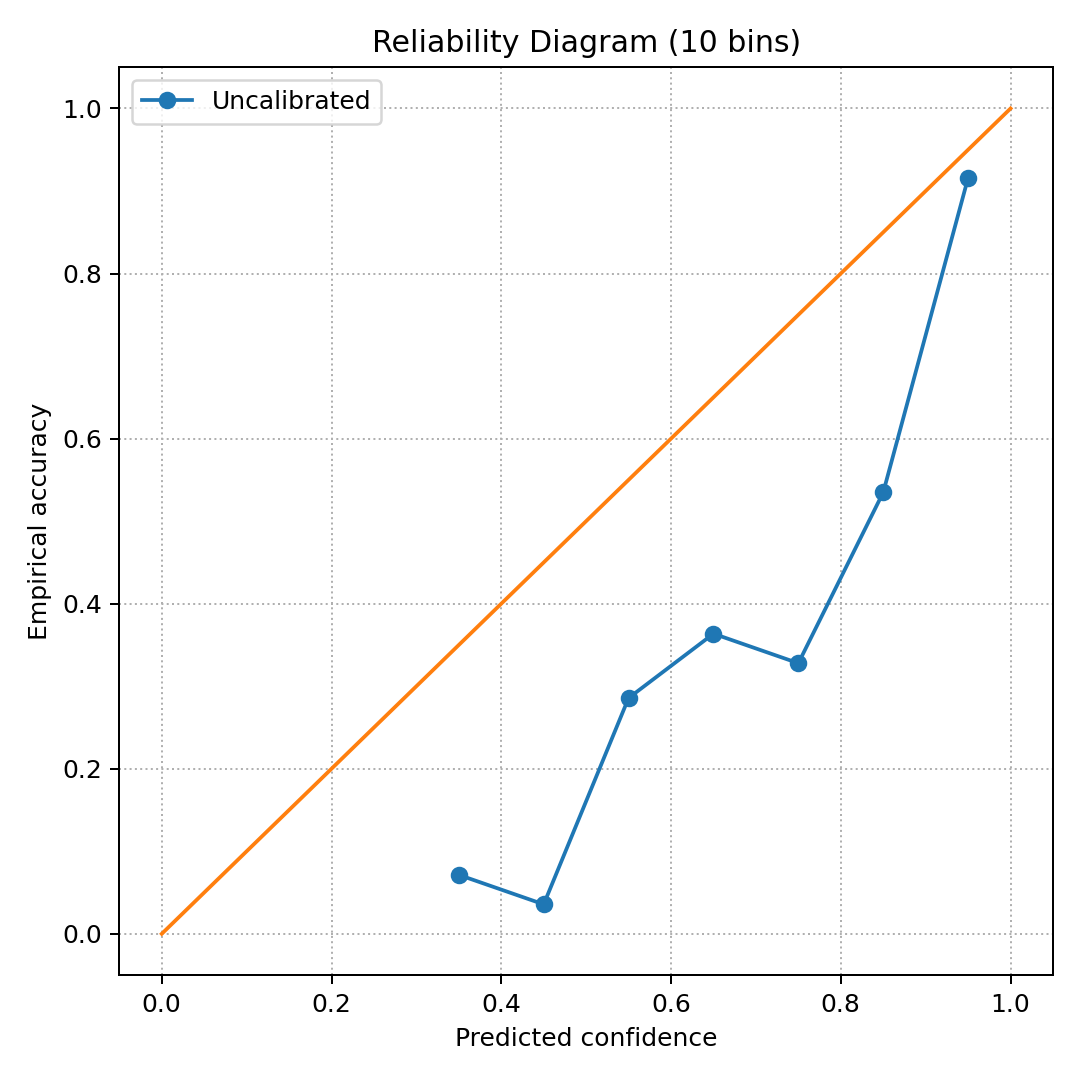

In [45]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/a2_runs/a2_hybrid_pamap2_cnn/analysis/calibration.png'))
